# Final Project 2 : Logistic Regression dan SVM
## Data Rain in Australia

### A. Perkenalan

#### Group 1 :
```
1. Nama: Javier Al Faiza
   ID: PYTN-KS20-013

2. Nama: Leticia
   ID: PYTN-KS20-023

3. Nama: Novita Nurul Hidayati
   ID: PYTN-KS20-021
```

#### A.1 Latar Belakang

Cuaca adalah kondisi atmosfer di suatu tempat pada waktu tertentu. Ini mencakup berbagai elemen seperti suhu udara, kelembaban, tekanan udara, angin, presipitasi (hujan, salju, hujan es), dan kondisi lainnya yang dapat diamati dalam jangka waktu pendek, biasanya dari beberapa jam hingga beberapa hari. Cuaca mempunyai peran yang sangat penting dalam kehidupan manusia. Manusia sangat tergantung pada kondisi cuaca dalam melakukan aktivitas. Cuaca diprediksi oleh ilmuwan cuaca menggunakan berbagai alat seperti radar, satelit, dan stasiun pengamatan. Prediksi cuaca bertujuan untuk memberikan perkiraan tentang kondisi atmosfer di masa mendatang, membantu orang untuk merencanakan kegiatan sehari-hari, mengantisipasi bencana alam, serta memberikan informasi penting bagi berbagai sektor, termasuk pertanian, transportasi, dan industri lainnya, perkiraan cuaca menjadi sangat penting bagi manusia agar dapat merencanakan aktivitas mereka dengan baik. Beberapa faktor alam yang dapat mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, dan kecepatan angin. Di antara fenomena cuaca yang sangat memengaruhi kehidupan manusia adalah hujan. Oleh karena itu, diperlukan suatu analisis dan model yang dapat memprediksi kemungkinan terjadinya hujan agar manusia dapat mengatur aktivitas mereka secara lebih efektif. 

#### A.2 Dataset

Dataset yang digunakan adalah dataset yang berjudul Rain in Australia yang berasal diambil dari website kaggle <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package" title="Rain in Australia">Rain in Australia</a>

Dataset ini berisi tentang histori cuaca harian selama 10 tahun dari berbagai lokasi di Australia yang terdiri dari 145460 baris dan 23 atribut.

RainTommorow akan menjadi target variable yang akan diprediksi. Itu berarti apakah besok akan hujan, Ya atau Tidak? Kolom ini akan berisikan Ya apabila hujan di hari itu lebih dari atau sama dengan 1mm

#### A.3 Objektif yang ingin dicapai

Objektif yang ingin dicapai melalui analisis yang dilakukan ini adalah :

- Mengetahui faktor-faktor apa saja yang mempengaruhi cuaca di kemudian hari
- Memprediksi apakah akan terjadi hujan di suatu tempat berdasarkan faktor-faktor yang mempengaruhi dengan menggunakan motode Logistic Regression dan SVM(Support Vector Machine)

### B. Import Pustaka

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

### C. DATA LOADING

Dataset yang digunakan adalah weatherAUS.csv

#### C.1 Proses Data Loading

In [2]:
# Read Dataset
df = pd.read_csv('./dataset/weatherAUS.csv')
# Menampilkan Dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#### C.2 Eksplorasi Data Sederhana

In [3]:
# memeriksa kolom pada data
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [60]:
# Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

Dataset ini terdiri dari tipe data float, object, dan integer.

Dapat juga dilihat pada informasi di atas, terdapat cukup banyak missing value yang ada pada tiap kolom tersebut. Hal itu dapat dilihat dari ketidak sesuaian jumlah nilai Non-Null pada seiap kolom

In [4]:
# Melihat bentuk dari dataset
df.shape

(145460, 23)

Dataset ini memiliki 23 kolom dan 145460 baris

In [5]:
# Melihat 5 Data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Melihat 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Pada dataset ini sudah terurut secara alfabet untuk lokasi yang dilakukan observasi, sehingga data teratas dan terbawah merupakan berdasarkan urutan abjad pada kolom **Location**

In [7]:
# Mengelompokkan tiap kolom berdasarkan kategorikal dan numerikal

# Variabel bertipe kategorik
categorical = list(df.select_dtypes(include=['object']).columns)

# Variabel bertipe numerik
numerical = list(df.select_dtypes(exclude=['object']).columns)


In [8]:
# Menampilkan kolom-kolom kategorikal dan numerikal
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [87]:
# Melihat jumlah Yes dan No pada kolom **RainTomorrow**
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [53]:
# Mengecek missing values pada dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Dari informasi di atas masih banyak data yang memiliki missing values.

In [54]:
# Menghitung persentase missing values pada setiap atribut yang bersifat numerikal
df[numerical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

MaxTemp           0.87 %
MinTemp           1.02 %
WindSpeed9am      1.21 %
Temp9am           1.21 %
Humidity9am       1.82 %
Pressure3pm      10.33 %
Pressure9am      10.36 %
WindSpeed3pm      2.11 %
Rainfall          2.24 %
Temp3pm           2.48 %
Humidity3pm        3.1 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustSpeed     7.06 %
dtype: object

```
Dari hasil perhitungan di atas, terdapat beberapa atribut yang memiliki 
persentase missing values yang cukup besar, diantaranya :

- Cloud9am    : 38.42 %
- Cloud3pm    : 40.81 %
- Evaporation : 43.17 %
- Sunshine    : 48.01 %
```

In [55]:
# Menghitung persentase missing values pada setiap atribut yang bersifat kategorikal
df[categorical].apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)

Date             0.0 %
Location         0.0 %
RainToday       2.24 %
RainTomorrow    2.25 %
WindDir3pm      2.91 %
WindGustDir      7.1 %
WindDir9am      7.26 %
dtype: object

Sementara untuk atribut yang bersifat kategorikal, persentase missing values pada tiap atribut terbilang kecil karna tidak ada yang mencapai 10 %

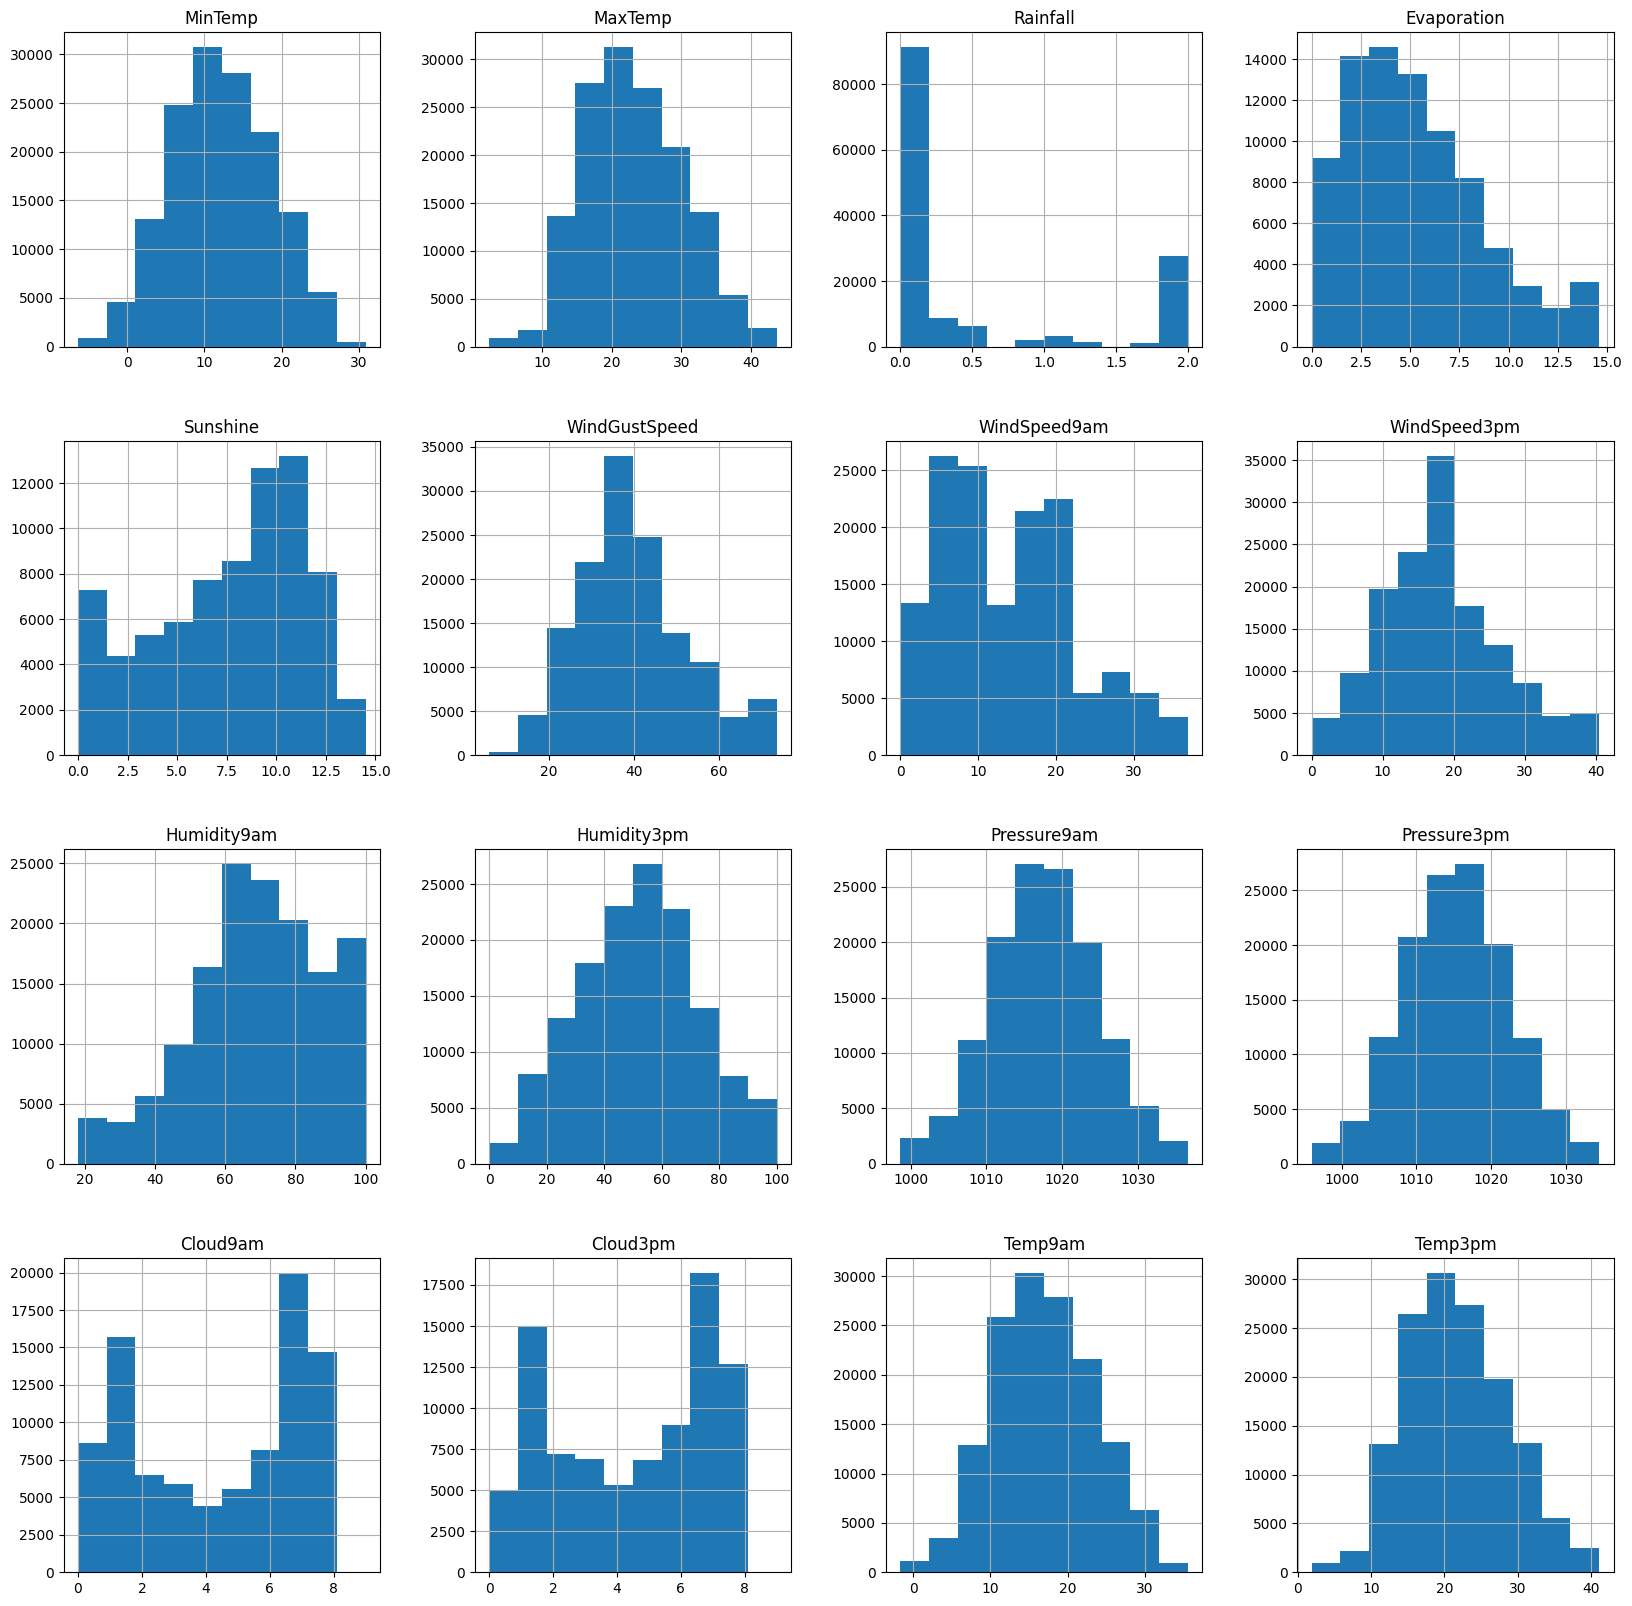

In [56]:
# Membuat histogram untuk melihat distribusi dari nilai untuk setiap atribut numerikal
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

Berdasarkan histogram yang sudah dibuat dari tiap atribut numerikal, jika dilihat secara sekilas sebagian besar nilai pada tiap atribut memiliki distribusi normal. Sedangkan sisanya memiliki nilai skewness yang cukup tinggi

In [57]:
from scipy.stats import skew, kurtosis, normaltest

# Menghitung mean dan std deviasi dari data
mean = np.mean(df[numerical])
std_dev = np.std(df[numerical])

# Menghitung skewness dan kurtosis dari data
skewness = skew(df[numerical])
kurtosis_val = kurtosis(df[numerical])

# Melakukan uji normalitas menggunakan normaltest
ntest = normaltest(df[numerical])

print(mean)
print('---')
print(std_dev)
print('---')
print(skewness)
print('---')
print(kurtosis_val)
print('---')
print(ntest)

151.18902478072792
---
MinTemp           6.397719
MaxTemp           7.100607
Rainfall          0.792806
Evaporation       3.418058
Sunshine          3.785458
WindGustSpeed    12.981818
WindSpeed9am      8.607753
WindSpeed3pm      8.532437
Humidity9am      18.876542
Humidity3pm      20.795828
Pressure9am       7.025420
Pressure3pm       6.976927
Cloud9am          2.887143
Cloud3pm          2.720342
Temp9am           6.481303
Temp3pm           6.909024
dtype: float64
---
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
---
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
---
NormaltestResult(statistic=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan]))


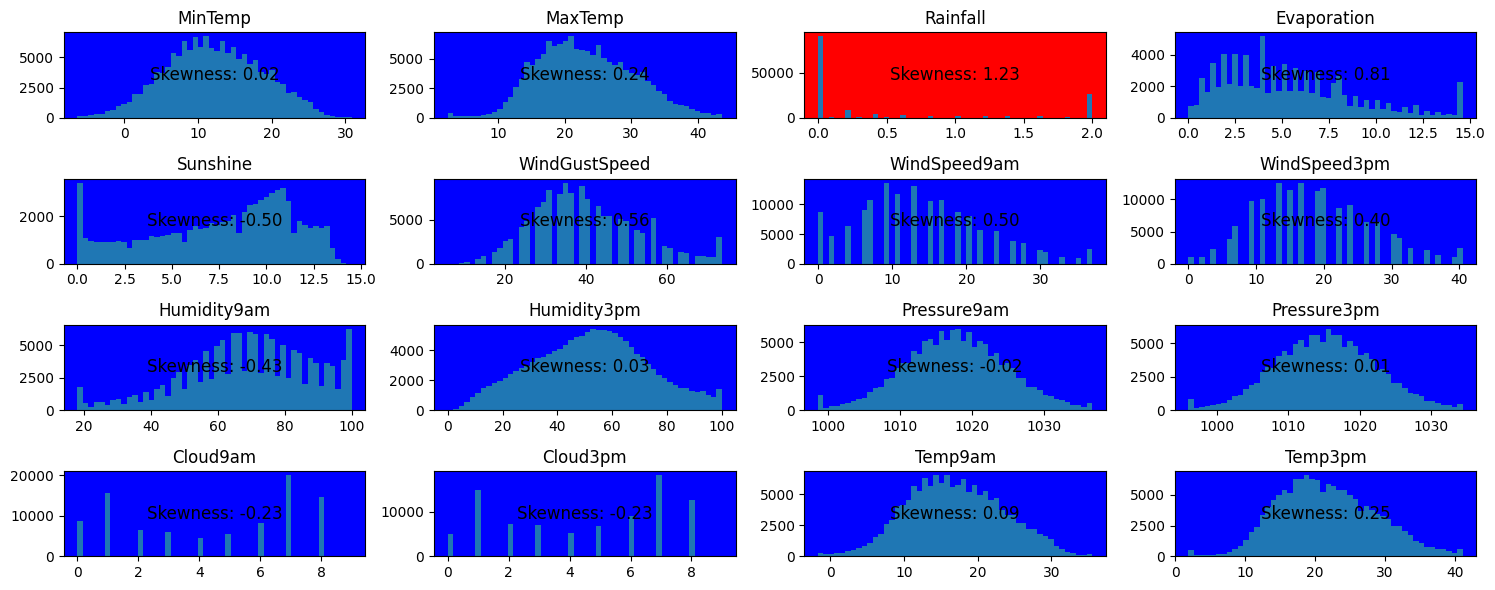

In [58]:
from scipy.stats import normaltest

# Membuat histogram untuk setiap atribut numerik dan mengecek skewness
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 6))

for ax, col in zip(axs.flat, df.select_dtypes(include='number').columns):
    ax.hist(df[col], bins=50)
    ax.set_title(col)

    skewness = df[col].skew()
    if abs(skewness) > 1:
        ax.set_facecolor('red')
        ax.text(0.5, 0.5, f"Skewness: {skewness:.2f}", fontsize=12, ha='center', va='center', transform=ax.transAxes)
    else:
        _, p = normaltest(df[col])
        alpha = 0.05
        if p < alpha:
            ax.set_facecolor('red')
            ax.text(0.5, 0.5, f"Skewness: {skewness:.2f}", fontsize=12, ha='center', va='center', transform=ax.transAxes)
        else:
            ax.set_facecolor('blue')
            ax.text(0.5, 0.5, f"Skewness: {skewness:.2f}", fontsize=12, ha='center', va='center', transform=ax.transAxes)

fig.tight_layout()
plt.show()


Jadi, meskipun pada grafik histogram terlihat bahwa distribusi data mungkin tidak normal, pengujian normalitas tetap perlu dilakukan untuk memastikan apakah data benar-benar terdistribusi normal atau tidak. Jika skewness lebih besar dari 1 atau kurang dari -1, maka kolom dianggap tidak normal. Jika skewness mendekati 0 atau tidak signifikan secara statistik (p-value > 0.05) dari normality test, maka kolom dianggap normal. Warna merah artinya data berdistribusi tidak normal, sedangkan biru artinya data berdistribusi normal.

Membuat lineplot untuk meilihat korelasi antara atribut **Sunshine** dengan **Rainfall** dan atribut **Sunshine** dengan **Evaporation**

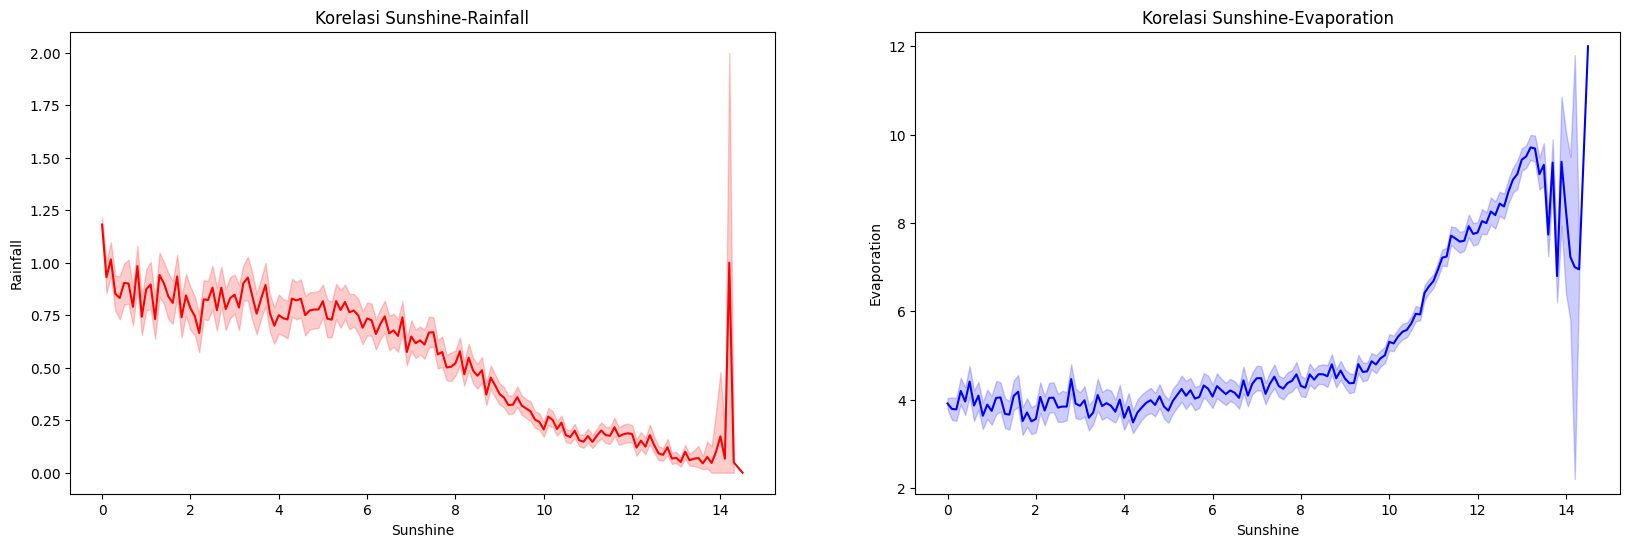

In [59]:
# Membuat lineplot untuk meilihat korelasi antara atribut **Sunshine** dengan **Rainfall** dan atribut **Sunshine** dengan **Evaporation**
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.title("Korelasi Sunshine-Rainfall")
sns.lineplot(data=df, x='Sunshine',y='Rainfall', color='red')

plt.subplot(122)
plt.title("Korelasi Sunshine-Evaporation")
sns.lineplot(data=df, x='Sunshine', y='Evaporation', color='blue')

plt.axis('equal')
plt.show()

Dapat dilihat dari lineplot di atas, bahwa atribut **Sunshine** memiliki korelasi yang berbanding terbalik dengan **Rainfall**, yang mana semakin tinggi nilai **Rainfall**(curah hujan), maka akan semakin kecil nilai **Sunshine**(intensitas cahaya matahari), dan sebaliknya.

Sedangkan korelasi antara **Sunshine** dan **Evaporation** memiliki nilai yang berbanding lurus, yang mana apabila intensitas matahari tinggi, maka akan tinggi juga nilai penguapan

In [60]:
# Melihat deskripsi statistik dasar dari tiap atribut numerikal
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.000000,130432.000000,89572.000000,86102.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,5.318667,7.611178,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.991728,21.686191
std,6.397741,7.100632,0.792809,3.418079,3.785483,12.981866,8.607783,8.532467,18.876608,20.795902,7.025447,6.976954,2.887159,2.720357,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000


Informasi yang didapat antara lain :
- Rata rata Rainfall adalah 2.36
- Max Evaporation adalah 145.00
- Min MinTemp adalah -8.00

In [61]:
# Melihat deskripsi statistik dasar dari tiap atribut kategorikal
df[categorical].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Informasi yang didapat antara lain:
- Jumlah kolom date yaitu 145460
- Unique pada kolom WindGustDir sebesar 16 kolom
- Freq yang sering muncul pada kolom Location adalah 3436

### D. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

In [62]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [63]:
# Mengubah data pada atribut Date menjadi data dengan format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Melakukan pemisahan terhadap atribut Date, menjadi Day, Month, dan Year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Melakukan penghapusan terhadap atribut Date
df.drop('Date', axis = 1, inplace = True)


In [64]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [65]:
# Melakukan pengecekan duplikasi data
df.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset

#### D.1 Handling Outliers

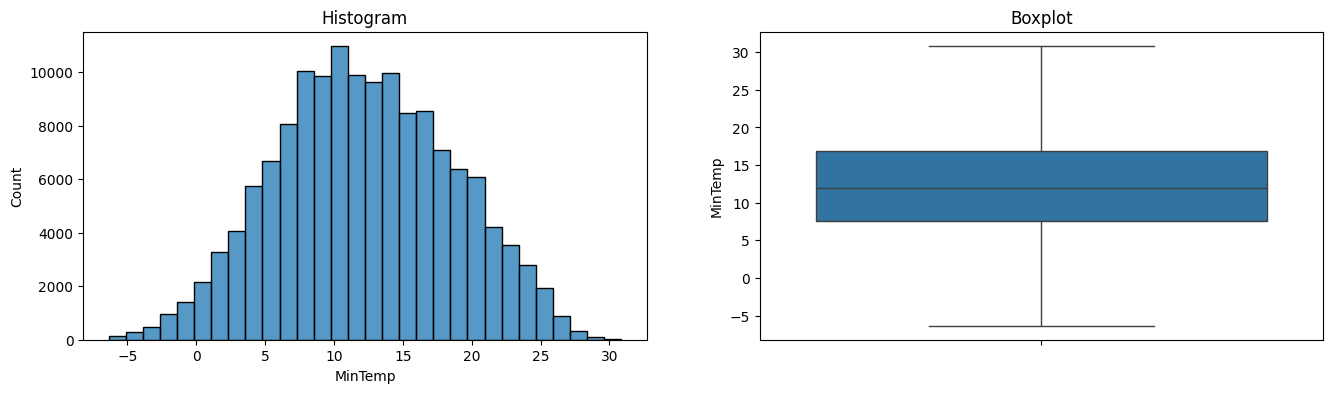

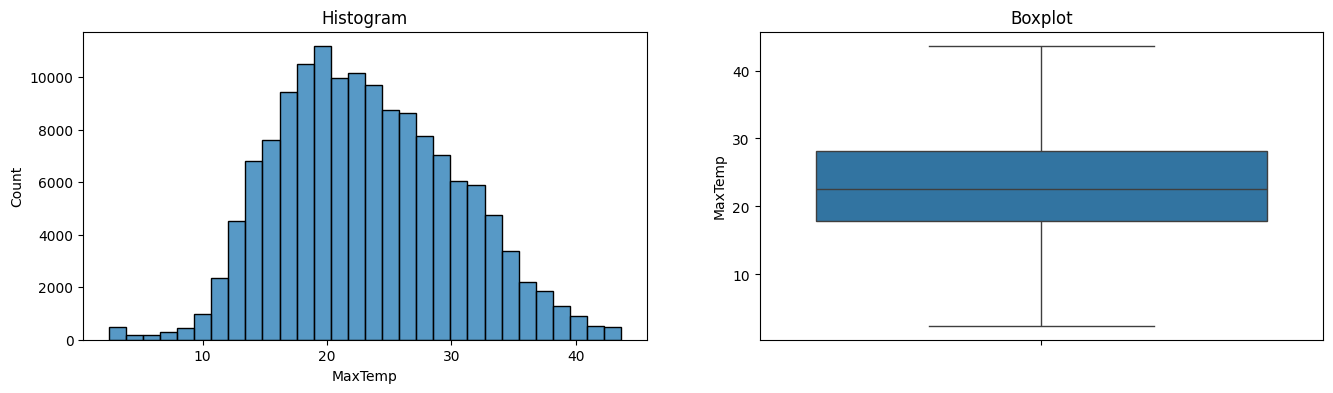

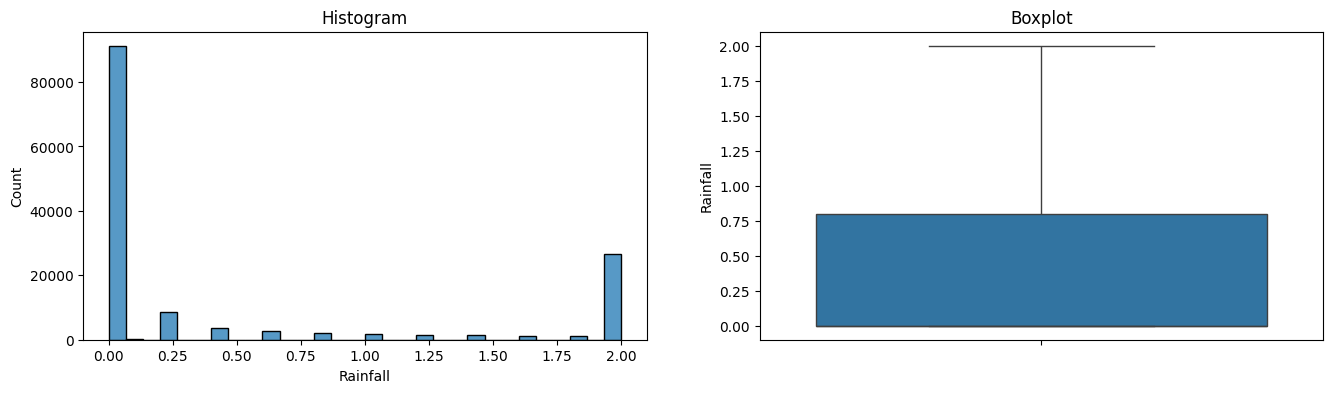

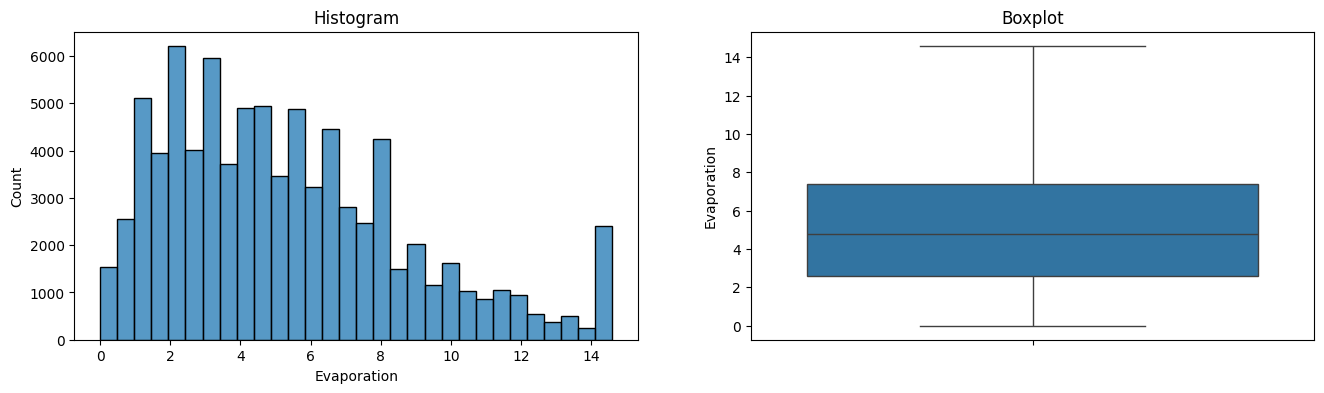

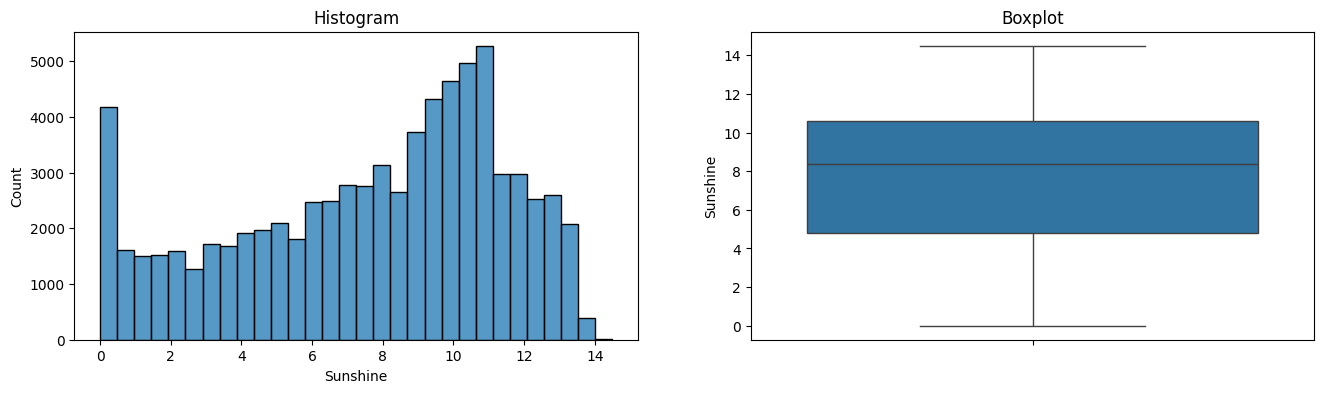

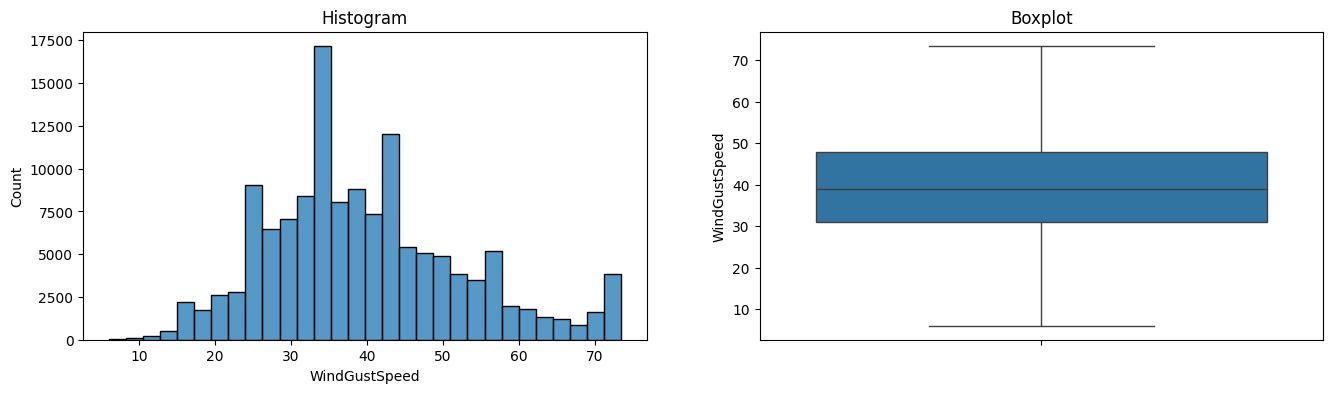

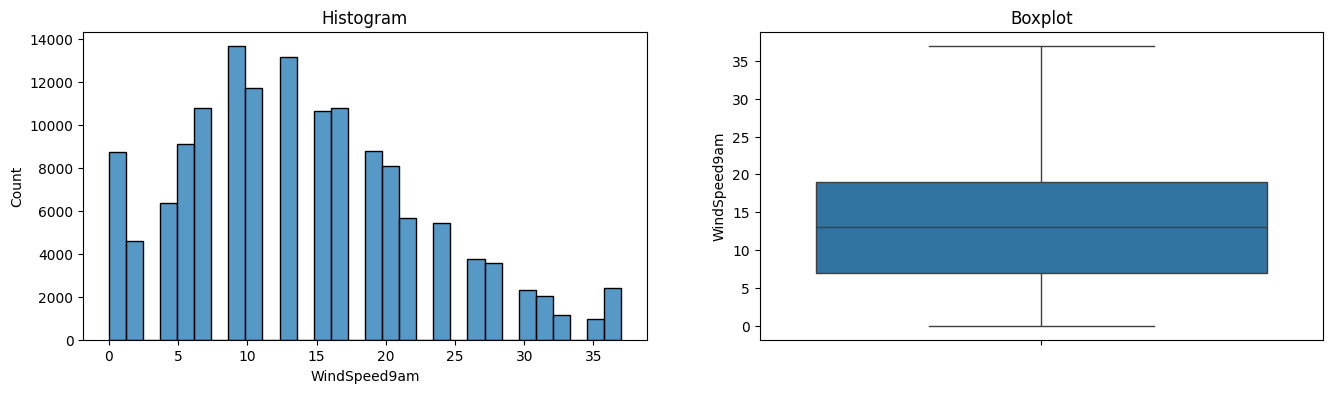

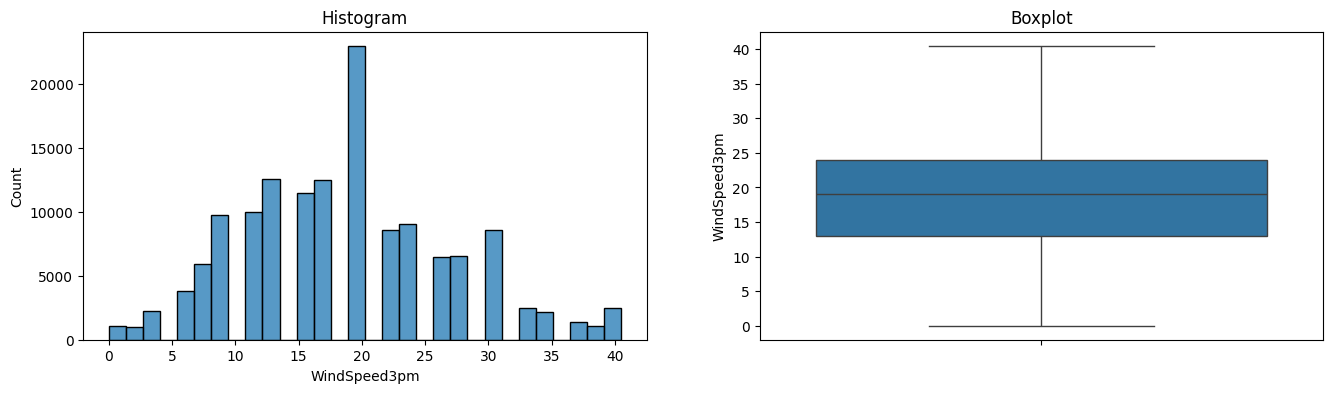

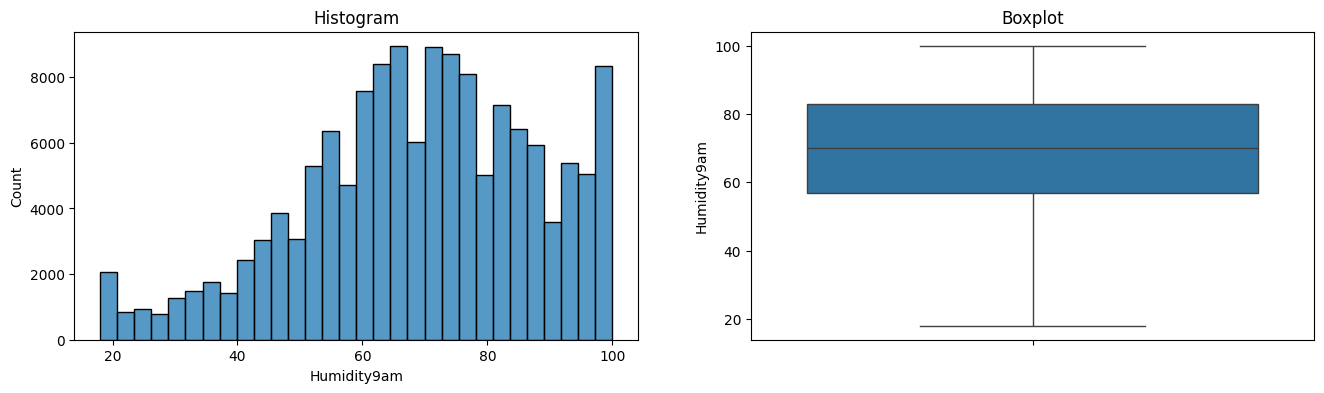

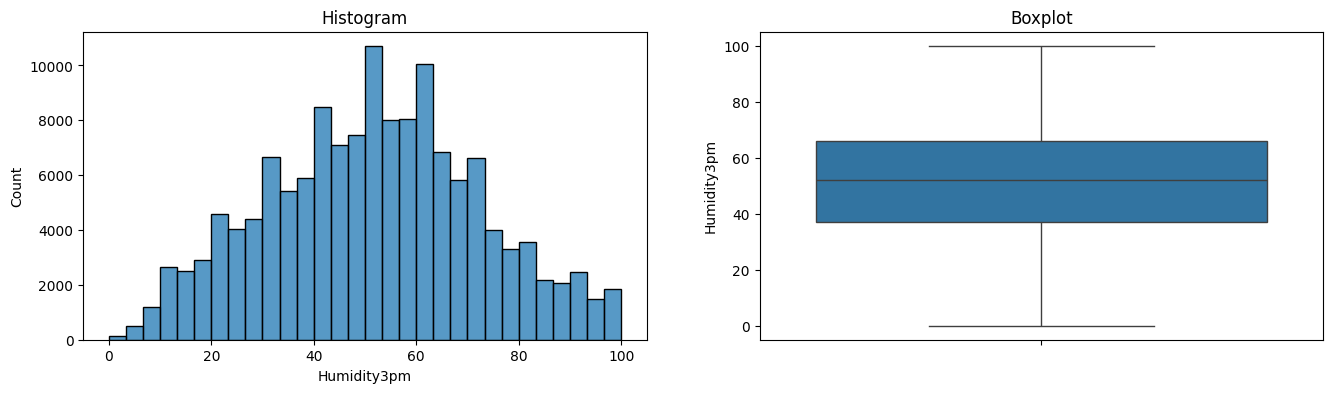

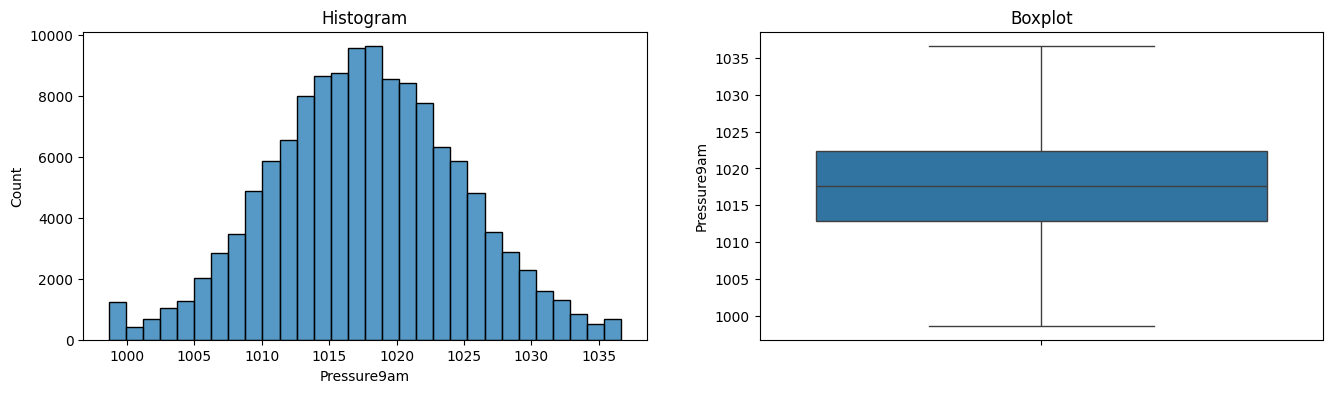

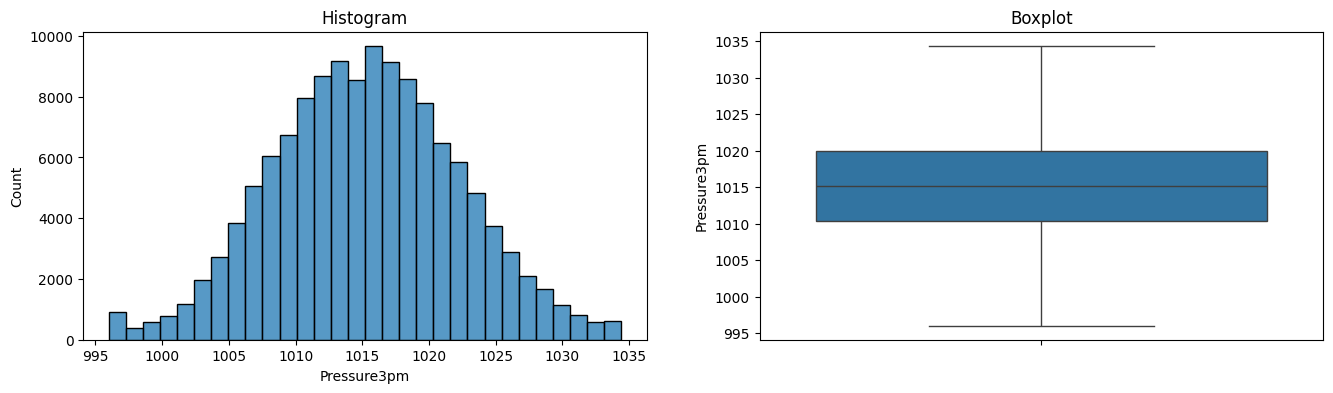

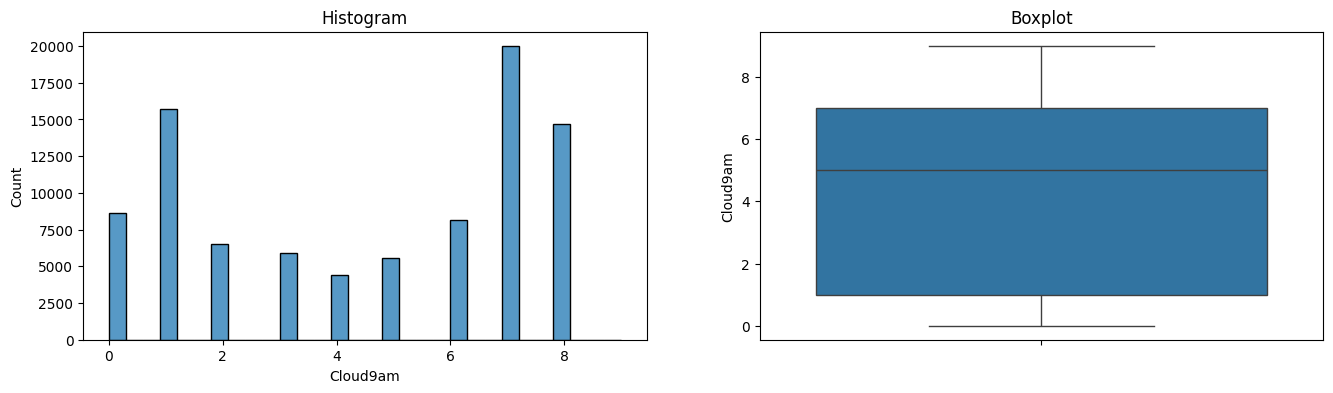

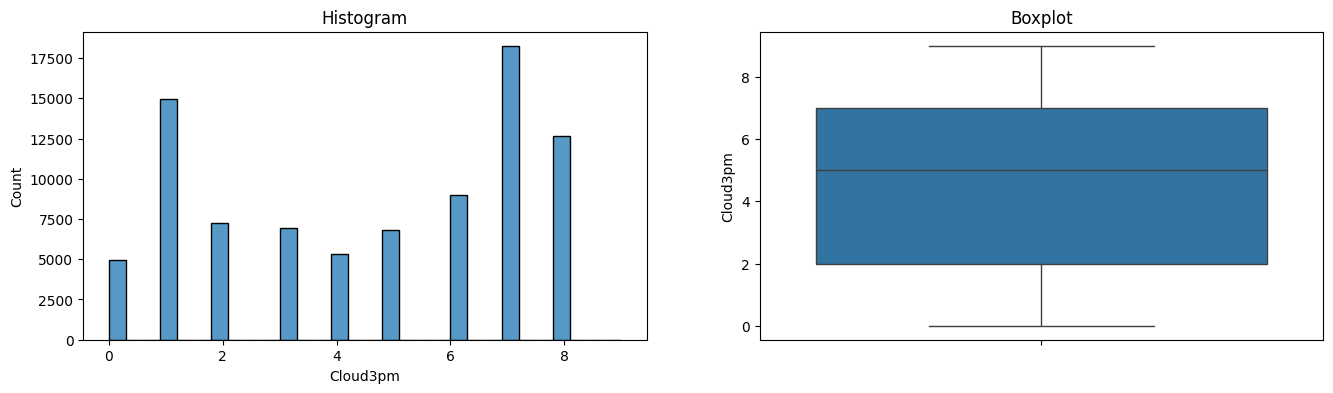

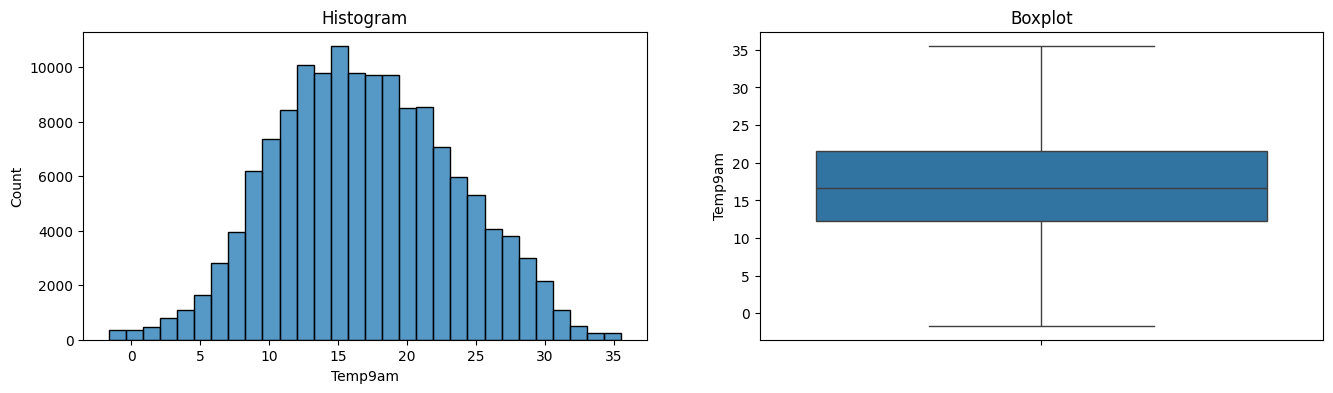

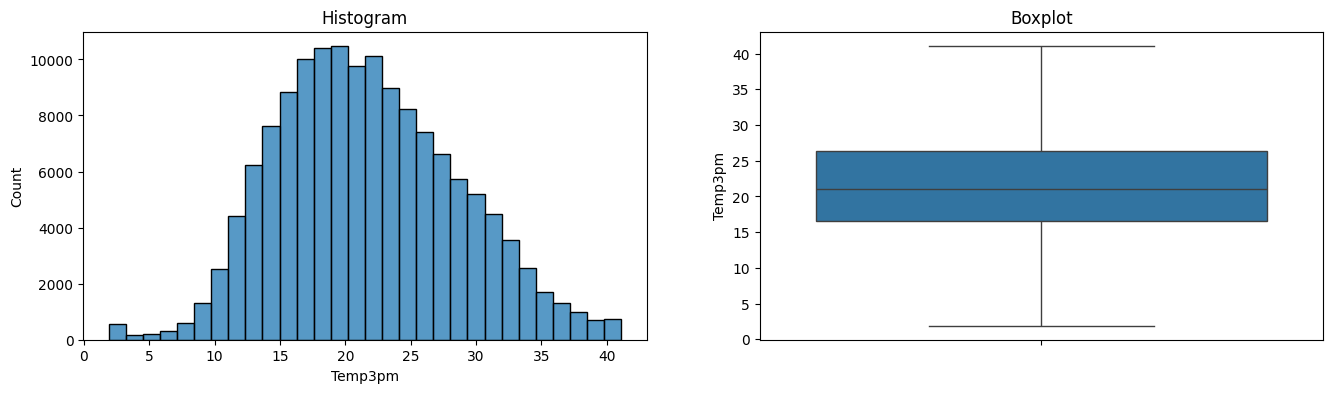

In [66]:
# Membuat histogram dan boxplot untuk setiap atribut numerikal untuk melihat outliers
for feature in numerical:
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[feature],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[feature])
    plt.title('Boxplot')

    plt.show()

Gambar diatas merupakan histogram dan boxplot untuk setiap atribut numerikal untuk melihat outliers. Rata rata kolom pada numerikal mempunyai outliers dan berdistribusi normal, walaupun ada juga yang memiliki distribusi tidak normal.

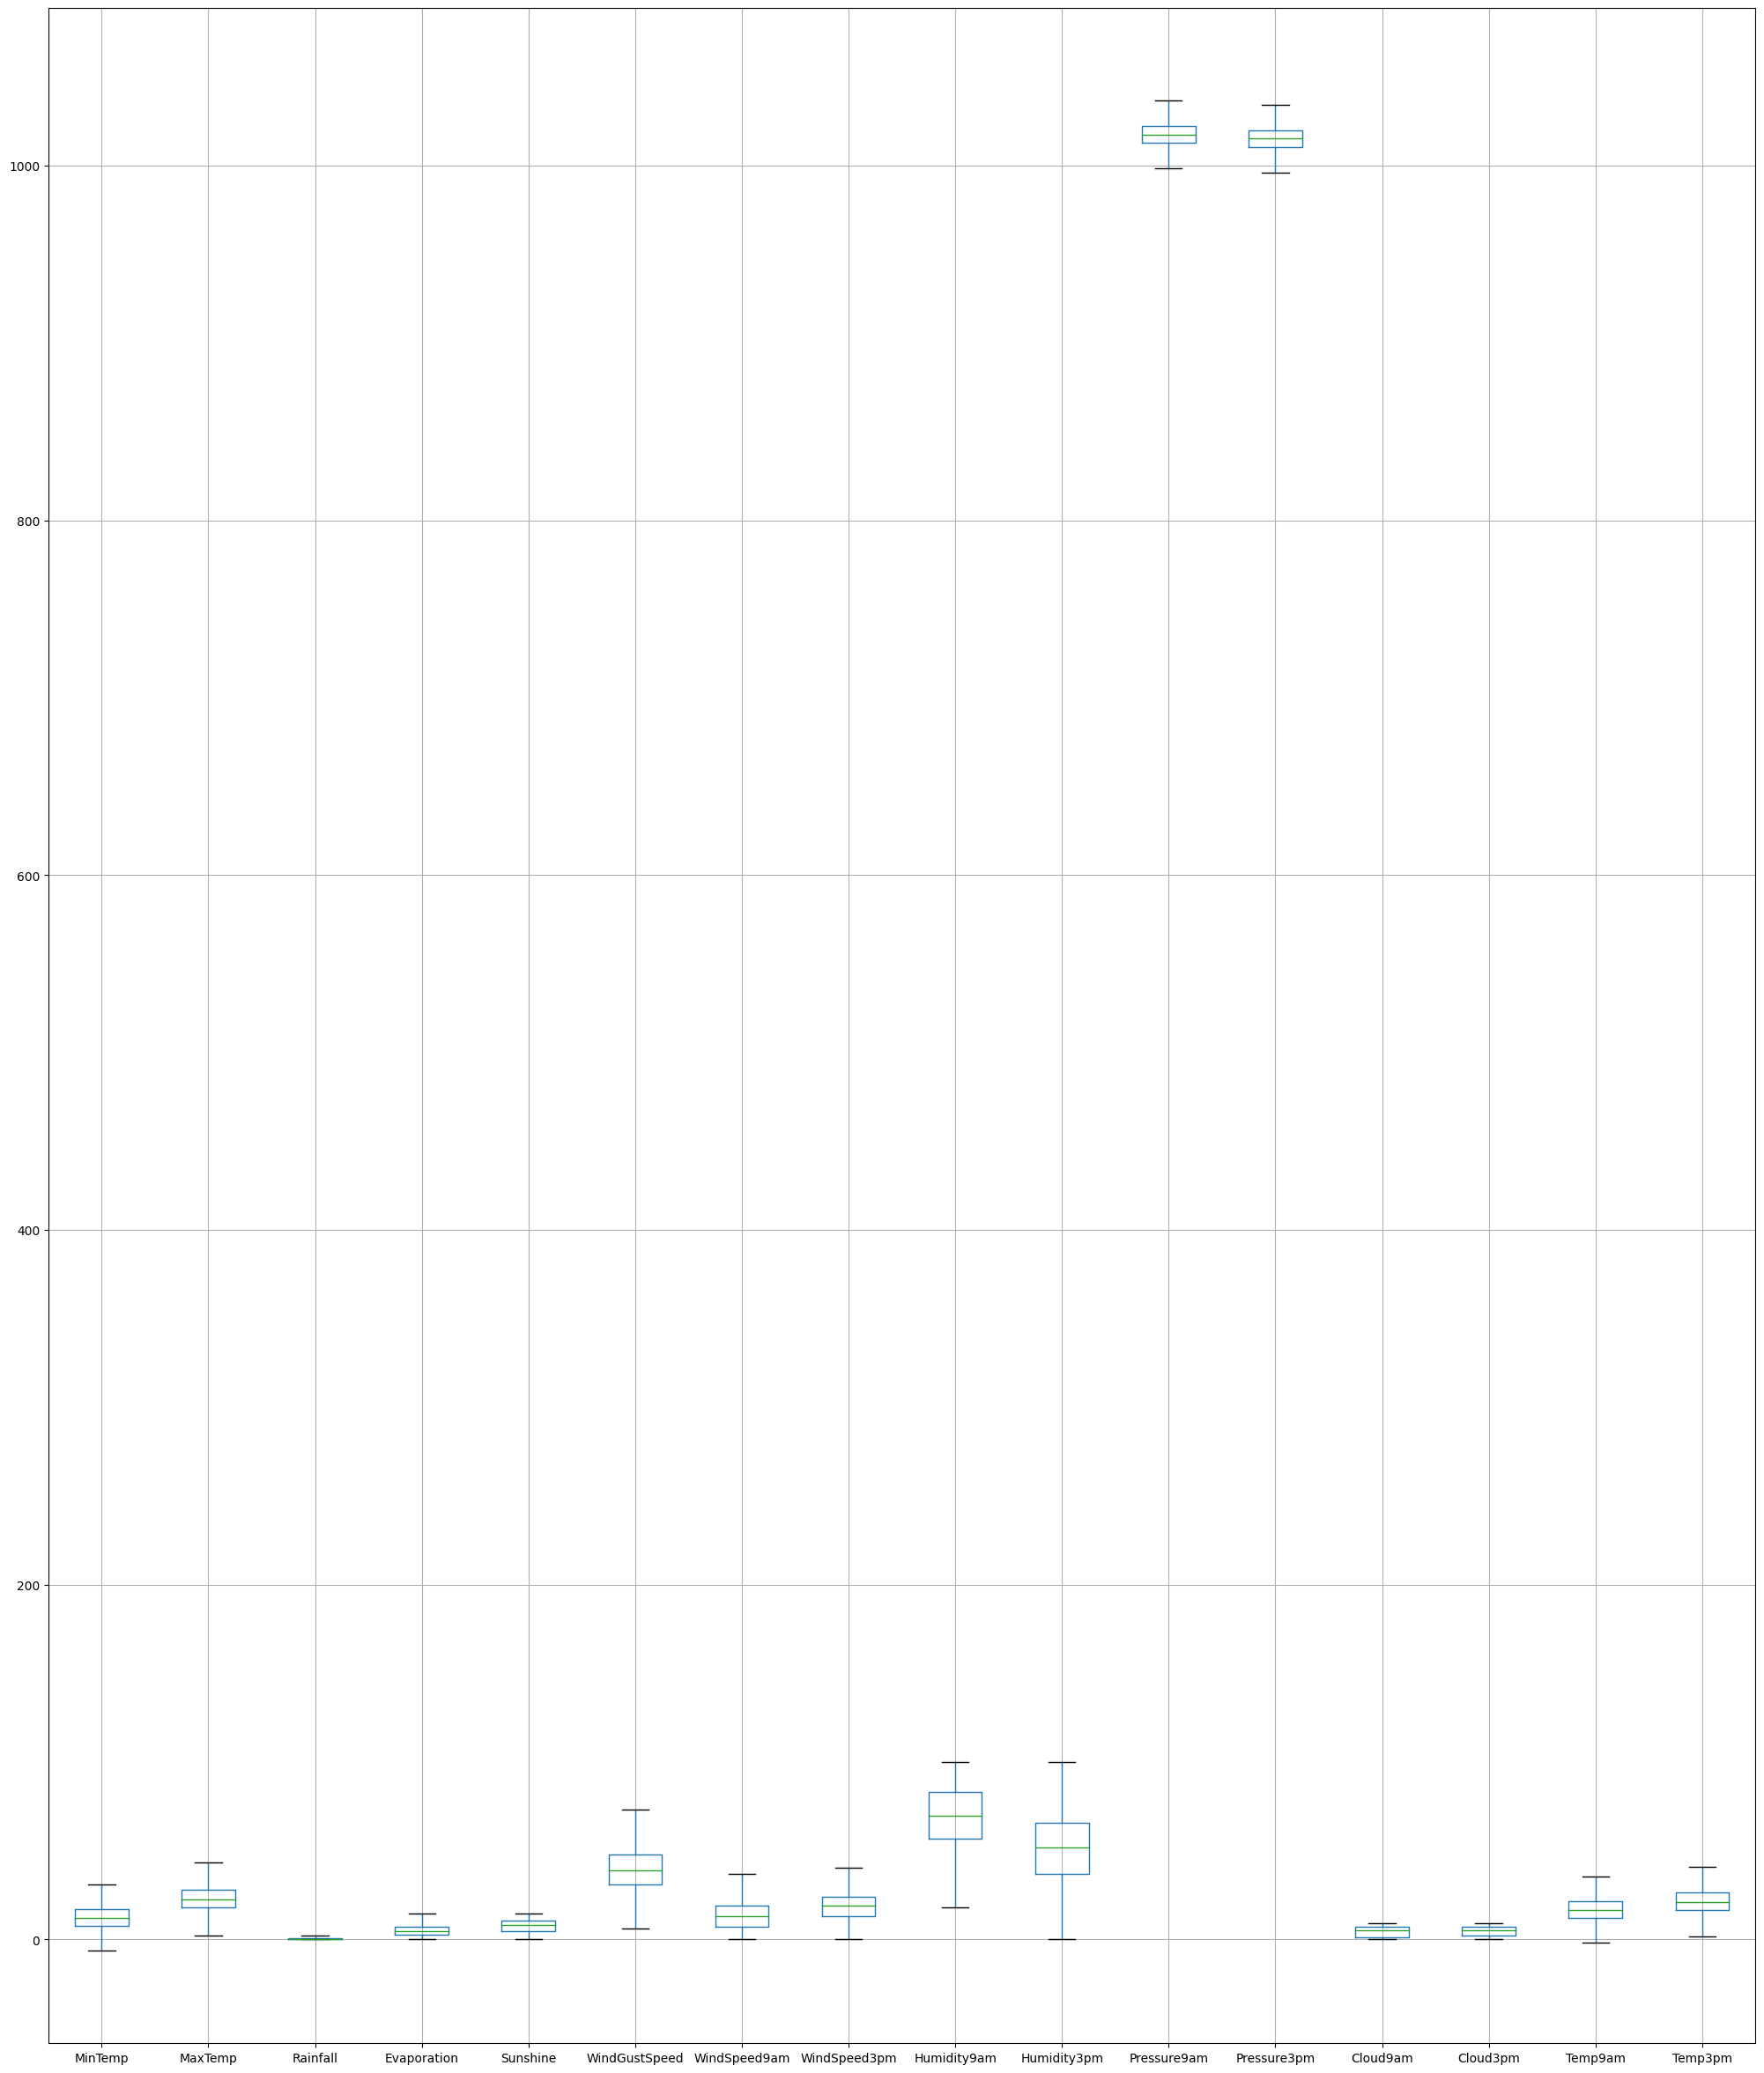

In [68]:
# Membuat semua boxplot dari atribut numerikal di dalam satu gambar
df[numerical].boxplot(figsize=(25,30))
plt.show()

Boxplot di atas menunjukkan terdapat jumlah outlier yang banyak pada atribut **MinTemp**, **MaxTemp**, **Rainfall**, **Evaporation**, **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm**, **Humidity9am**, **Pressure9am**, **Pressure3pm**, **Temp9am**, dan **Temp3pm**.

In [71]:
# Memasukkan atribut-atribut yang memiliki outliers besar pada sebuah variable outlier
outlier = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']
print('outlier :',outlier)


outlier : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [72]:
# Handling Outliers dengan IQR
for feature in outlier:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

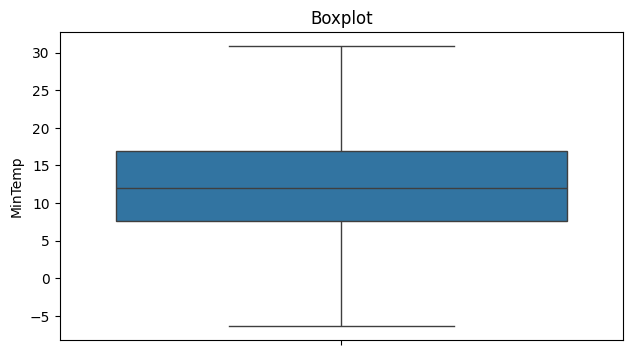

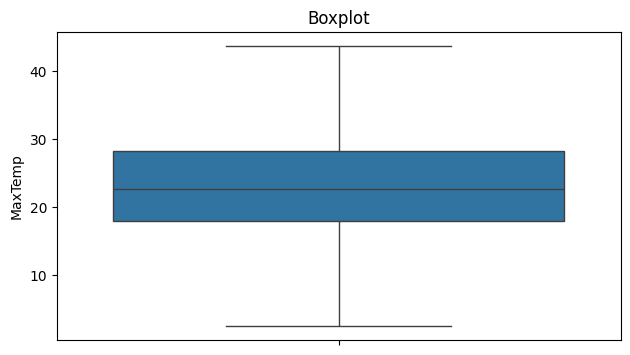

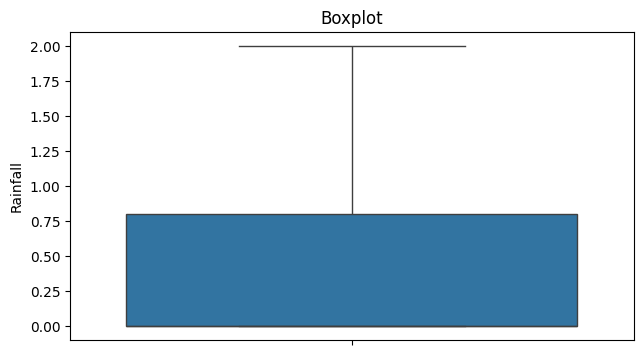

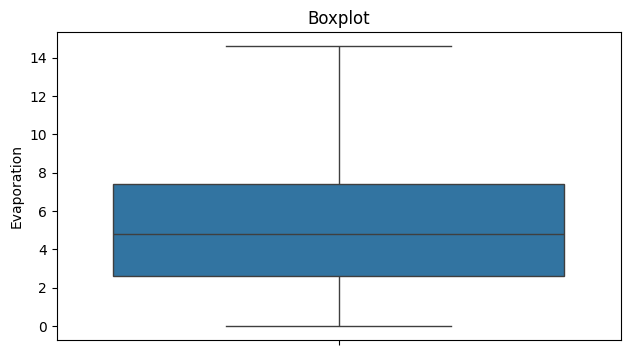

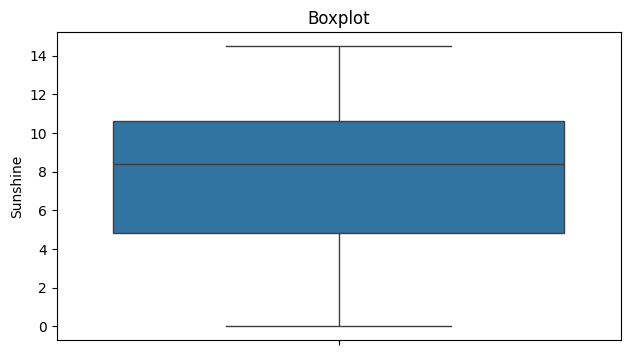

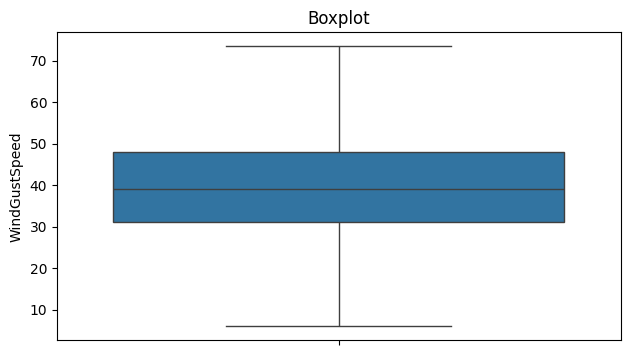

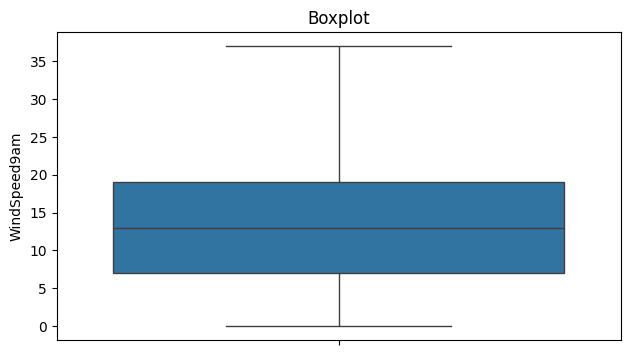

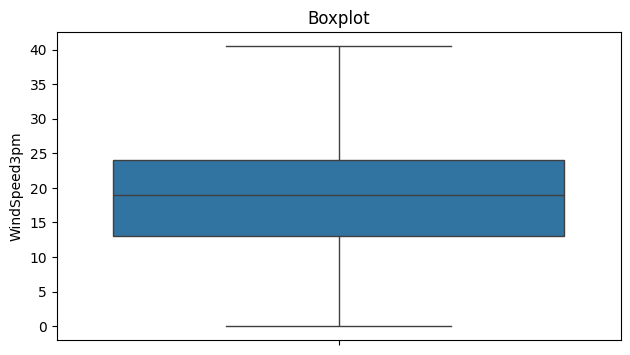

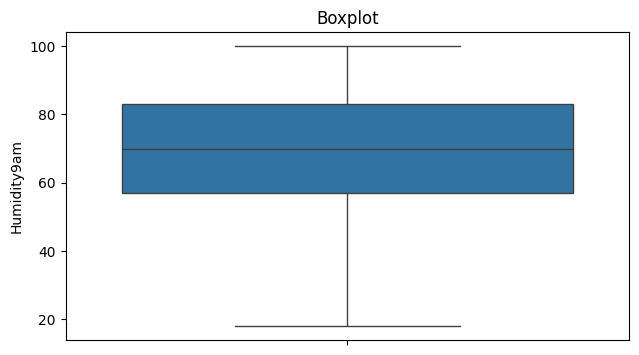

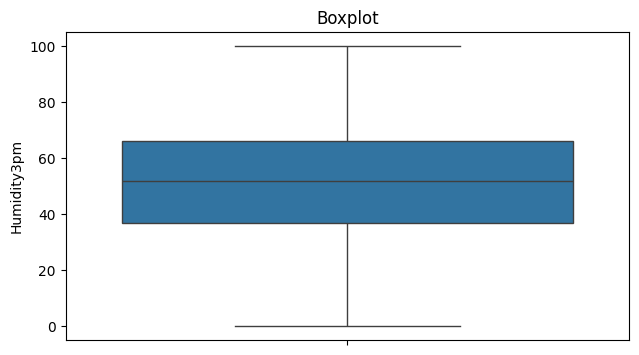

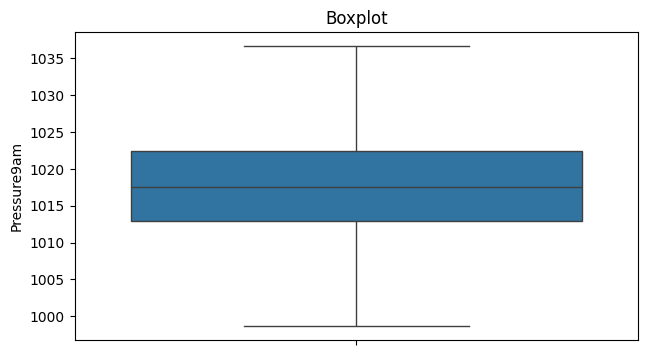

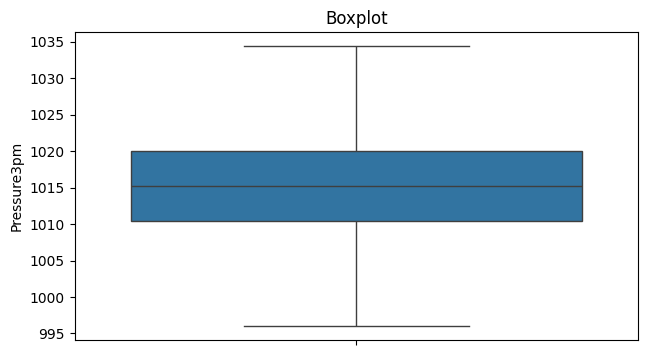

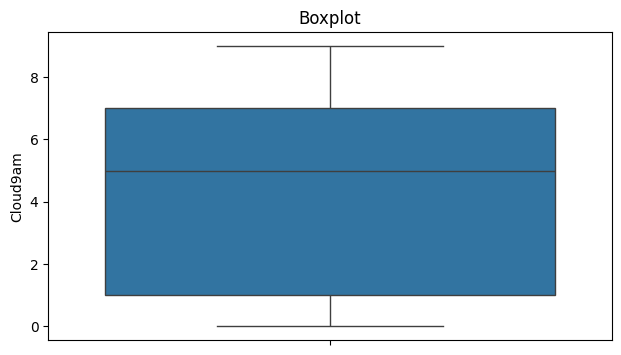

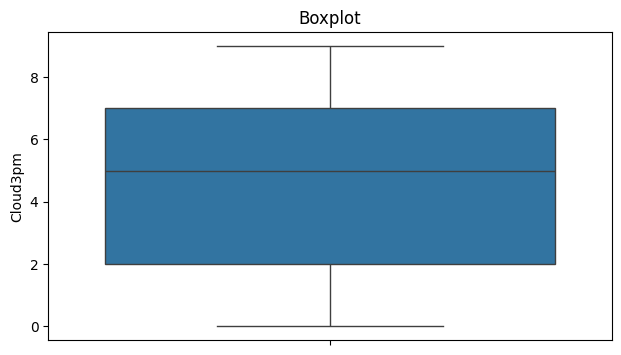

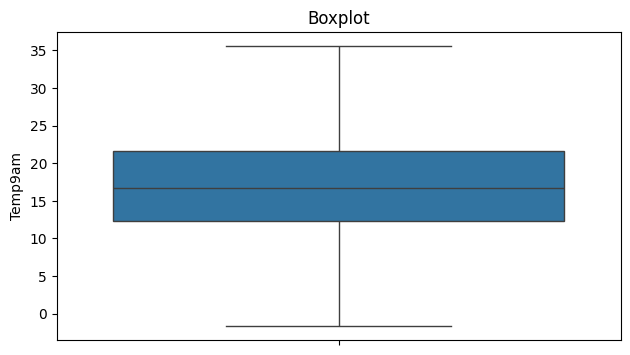

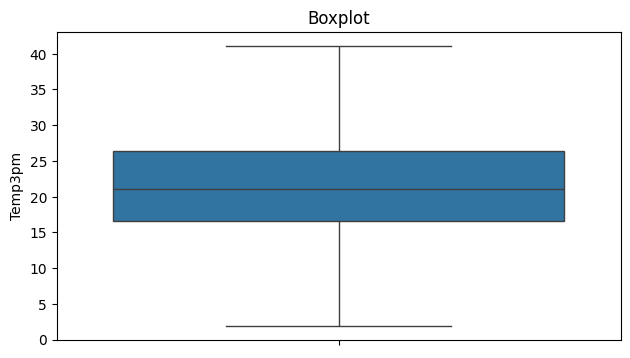

In [73]:
# Menampilkan boxplot pada tiap atribut numerikal untuk melihat outlier yang sudah dihandling
for feature in numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,2)
    sns.boxplot(y=df[feature])
    plt.title('Boxplot')

Gambar diatas merupakan boxplot pada tiap atribut numerikal yang sudah dihandling outliers. Setelah di handling outliers atribut numerikal tidak memiliki outliers, berbeda dengan boxplot sebelumnya.

In [74]:
# Mengecek deskripsi statistik dari atribut yang sudah dilakukan handling outliers
df[outlier].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,135197.000000,143693.000000,142398.000000,142806.000000,130395.000000,130432.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,5.318667,39.837792,13.951313,18.574162,68.933567,1017.670297,1015.269781,16.991728,21.686191
std,6.397741,7.100632,0.792809,3.418079,12.981866,8.607783,8.532467,18.876608,7.025447,6.976954,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,998.650000,996.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,31.000000,7.000000,13.000000,57.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,39.000000,13.000000,19.000000,70.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,48.000000,19.000000,24.000000,83.000000,1022.400000,1020.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,14.600000,73.500000,37.000000,40.500000,100.000000,1036.650000,1034.400000,35.550000,41.100000


Informasi yang didapat antara lain :
- Rata rata Rainfall sebelumnya adalah 2.36, namun setelah di handling menjadi 0.48
- Max Evaporation sebelumnya adalah 145.00, namun setelah di handling menjadi14.60
- Min MinTemp sebelumnya adalah -8.00, namun setelah di handling menjadi -6.35

#### D.2 Handling Missing Values

Handling missing values yang akan dilakukan disini adalah dengan mengisi atribut numerikal dengan nilai mean, dan mengisi atribut kategorikal dengan nilai modus

In [92]:
# Membuat dataframe baru yaitu df3 yang berisi nilai selain nilai variable target
df3 = df.drop(df[df['RainTomorrow'].isnull()].index)

In [93]:
# Menghitung persentase missing values pada setiap atribut
missing_value = df3.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

Location           0.0 %
Day                0.0 %
RainTomorrow       0.0 %
Month              0.0 %
Year               0.0 %
MaxTemp           0.22 %
MinTemp           0.44 %
Temp9am           0.62 %
WindSpeed9am      0.93 %
RainToday         0.97 %
Rainfall          0.97 %
Humidity9am       1.22 %
WindSpeed3pm      1.81 %
Temp3pm           1.87 %
Humidity3pm       2.48 %
WindDir3pm         2.6 %
Cloud9am         36.89 %
Cloud3pm         39.25 %
Evaporation      41.83 %
Sunshine         46.62 %
WindGustSpeed     6.37 %
WindGustDir       6.41 %
WindDir9am        6.88 %
Pressure3pm       9.61 %
Pressure9am       9.63 %
dtype: object

Presentase tertinggi adalah sunshine dengan 46.62%.

In [94]:
# Membuat variabel baru bernama dist_unnromal untuk atribut dengan distribusi tidak normal
dist_unnormal = df3[['Evaporation','Rainfall']]

In [95]:
# Melakukan handling missing values pada data dalam atribut numerikal yang distribusinya bersifat tidak normal mengisi nilai NaN dengan nilai median dari data
for num_col in dist_unnormal:
    df3[num_col].fillna(df3[num_col].median(),inplace=True)

In [96]:
# Melakukan handling missing values pada data dalam atribut numerikal dengan mengisi nilai NaN dengan nilai mean dari data
for num_col in numerical:
    df3[num_col].fillna(df3[num_col].mean(),inplace=True)

In [97]:
# Melakukan pengecekan apakah masih ada data yang null pada atribut numerikal
df3[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Tidak ada data yang memiliki missing values.

In [98]:
# Melakukan update pada list atribut kategorikal
categorical = list(df.select_dtypes(include=['object']).columns)

In [99]:
df[categorical]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No
145458,Uluru,SE,SSE,N,No,No


In [100]:
# Melakukan handling missing values pada data dalam atribut numerikal dengan mengisi nilai NaN dengan nilai modus(mode) dari data
for cat_col in categorical:
    df3[cat_col].fillna(df3[cat_col].mode()[0],inplace=True)

In [101]:
# Melakukan pengecekan apakah masih ada data yang null pada atribut kategorikal
df3[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [102]:
# Melakukan pengecekan nilai null (missing values) pada dataframe df3
df3.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Dataset atau dataframe df3 sudah tidak mempunyai missing values lagi

In [103]:
# Mengganti nama tiap atribut dari bahasa inggris ke bahasa indonesia
df4 = df3.rename(columns={
    'Location':'Lokasi',
    'MinTemp': 'Suhu_Minimum',
    'MaxTemp': 'Suhu_Maksimum',
    'Rainfall':'Curah_Hujan',
    'Evaporation':'Penguapan',
    'Sunshine':'Sinar_Matahari',
    'WindGustDir':'Arah_Angin',
    'WindGustSpeed':'Kecepatan_Angin',
    'WindDir9am':'Arah_Angin_9Pagi',
    'WindDir3pm':'Arah_Angin_3Sore',
    'WindSpeed9am':'Kecepatan_Angin_9Pagi',
    'WindSpeed3pm':'Kecepatan_Angin_3Sore',
    'Humidity9am':'Kelembapan_9Pagi',
    'Humidity3pm':'Kelembapan_3Sore',
    'Pressure9am':'Tekanan_Udara_9Pagi',
    'Pressure3pm':'Tekanan_Udara_3Sore',
    'Cloud9am':'Awan_9Pagi',
    'Cloud3pm':'Awan_3Sore',
    'Temp9am':'Suhu_9Pagi',
    'Temp3pm':'Suhu_3Sore',
    'RainToday':'Hari_ini_Hujan',
    'RainTomorrow':'Hari_besok_Hujan',
    'Day':'Hari',
    'Month':'Bulan',
    'Year':'Tahun'})

In [104]:
df4

,Lokasi,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,...,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,Albury,13.4,22.9,0.6,4.8,7.624853,W,44.0,W,WNW,...,1007.1,8.000000,4.503167,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,4.8,7.624853,WNW,44.0,NNW,WSW,...,1007.8,4.437189,4.503167,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,4.8,7.624853,WSW,46.0,W,WSW,...,1008.7,4.437189,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,4.8,7.624853,NE,24.0,SE,E,...,1012.8,4.437189,4.503167,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,4.8,7.624853,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,7.624853,E,31.0,ESE,E,...,1021.2,4.437189,4.503167,9.4,20.9,No,No,20,6,2017
145455,Uluru,2.8,23.4,0.0,4.8,7.624853,E,31.0,SE,ENE,...,1020.3,4.437189,4.503167,10.1,22.4,No,No,21,6,2017
145456,Uluru,3.6,25.3,0.0,4.8,7.624853,NNW,22.0,SE,N,...,1019.1,4.437189,4.503167,10.9,24.5,No,No,22,6,2017
145457,Uluru,5.4,26.9,0.0,4.8,7.624853,N,37.0,SE,WNW,...,1016.8,4.437189,4.503167,12.5,26.1,No,No,23,6,2017


### E. Eksplorasi Data

#### E.1 Descriptive Statistics & Query

In [111]:
df4.describe()

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembapan_9Pagi,Kelembapan_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186549,23.229947,0.480920,5.098148,7.624853,39.789209,13.912024,18.549386,68.897257,51.482606,1017.674282,1015.272206,4.437189,4.503167,16.988469,21.689812,15.715084,6.402544,2012.758926
std,6.388173,7.091985,0.789391,2.598353,2.734927,12.540045,8.550996,8.447055,18.778693,20.532065,6.668626,6.623879,2.278080,2.104709,6.465182,6.844153,8.798150,3.426506,2.541256
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.700000,0.000000,4.800000,7.624853,39.000000,13.000000,18.549386,70.000000,51.482606,1017.674282,1015.272206,4.437189,4.503167,16.800000,21.300000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000,31.000000,12.000000,2017.000000


Diperoleh bahwa:

- Curah hujan rata-rata 0.48
- Kecepatan angin rata-rata berada pada 39.78
- Suhu terendah pada suhu minimum mencapai -6.35 derajat
- Suhu tertinggi pada suhu maksimum mencapai 43.65 derajat

In [112]:
# Memperoleh deskripsi statistik dari kolom-kolom yang memiliki tipe data objek/string.
df4.describe(include="O")

,Lokasi,Arah_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Hari_ini_Hujan,Hari_besok_Hujan
count,142193,142193,142193,142193,142193,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,19110,21406,14441,110738,110316


Dapat diperoleh :
- Terdapat 49 lokasi dengan lokasi paling banyak terletak di Canberra
- Arah angin paling sering adalah W
- Arah angin 9pagi paling sering adalah N
- Arah angin 3sore paling sering adalah SE
- Tidak hujan (No) lebih dominan pada atribut Hari_ini_Hujan dan Hari_besok_Hujan
- Cuaca yang paling sering muncul yakni Overcast

In [113]:
df4

,Lokasi,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,...,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,Albury,13.4,22.9,0.6,4.8,7.624853,W,44.0,W,WNW,...,1007.1,8.000000,4.503167,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,4.8,7.624853,WNW,44.0,NNW,WSW,...,1007.8,4.437189,4.503167,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,4.8,7.624853,WSW,46.0,W,WSW,...,1008.7,4.437189,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,4.8,7.624853,NE,24.0,SE,E,...,1012.8,4.437189,4.503167,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,4.8,7.624853,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,7.624853,E,31.0,ESE,E,...,1021.2,4.437189,4.503167,9.4,20.9,No,No,20,6,2017
145455,Uluru,2.8,23.4,0.0,4.8,7.624853,E,31.0,SE,ENE,...,1020.3,4.437189,4.503167,10.1,22.4,No,No,21,6,2017
145456,Uluru,3.6,25.3,0.0,4.8,7.624853,NNW,22.0,SE,N,...,1019.1,4.437189,4.503167,10.9,24.5,No,No,22,6,2017
145457,Uluru,5.4,26.9,0.0,4.8,7.624853,N,37.0,SE,WNW,...,1016.8,4.437189,4.503167,12.5,26.1,No,No,23,6,2017


In [114]:
# Mengidentifikasi rata-rata (mean) curah hujan dengan melakukan grouping berdasarkan lokasi.
df_mean = df4[['Lokasi','Curah_Hujan']].groupby('Lokasi').mean().sort_values(by='Curah_Hujan', ascending=False)
df_mean.T

Lokasi,Portland,Walpole,Dartmoor,NorfolkIsland,Cairns,MountGambier,Witchcliffe,Albany,CoffsHarbour,MountGinini,...,PearceRAAF,SalmonGums,Nhil,Katherine,Moree,Cobar,Mildura,AliceSprings,Uluru,Woomera
Curah_Hujan,0.794326,0.702235,0.687122,0.682659,0.674465,0.666799,0.641599,0.637798,0.618388,0.584589,...,0.360825,0.360068,0.350159,0.348813,0.289033,0.277142,0.245693,0.172814,0.163708,0.150836


Dapat dilihat bahwa daerah Portland memiliki rata-rata curah hujan tertinggi dengan nilai 0.79mm. Sedangkan Woomera memperoleh nilai terendah dengan nilai 0.15mm.

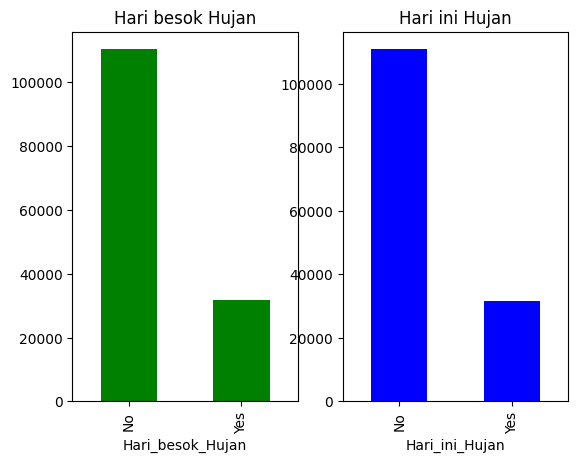

In [115]:
# Melihat persebaran data pada atribut Hari_ini_Hujan dan atribut target Hari_besok_Hujan
plt.subplot(1,2,1)
df4['Hari_besok_Hujan'].value_counts().plot.bar(color='g')
plt.title('Hari besok Hujan')

plt.subplot(1,2,2)
df4['Hari_ini_Hujan'].value_counts().plot.bar(color='b')
plt.title('Hari ini Hujan')
plt.show()

Dapat dilihat bahwa kedua histogram menunjukkan proporsi yang sama. Pada atribut target Hari_besok_Hujan, terdapat perbedaan yang cukup signifikan antara nilai No dan Yes. Oleh karena itu nantinya kita perlu melakukan resampling.

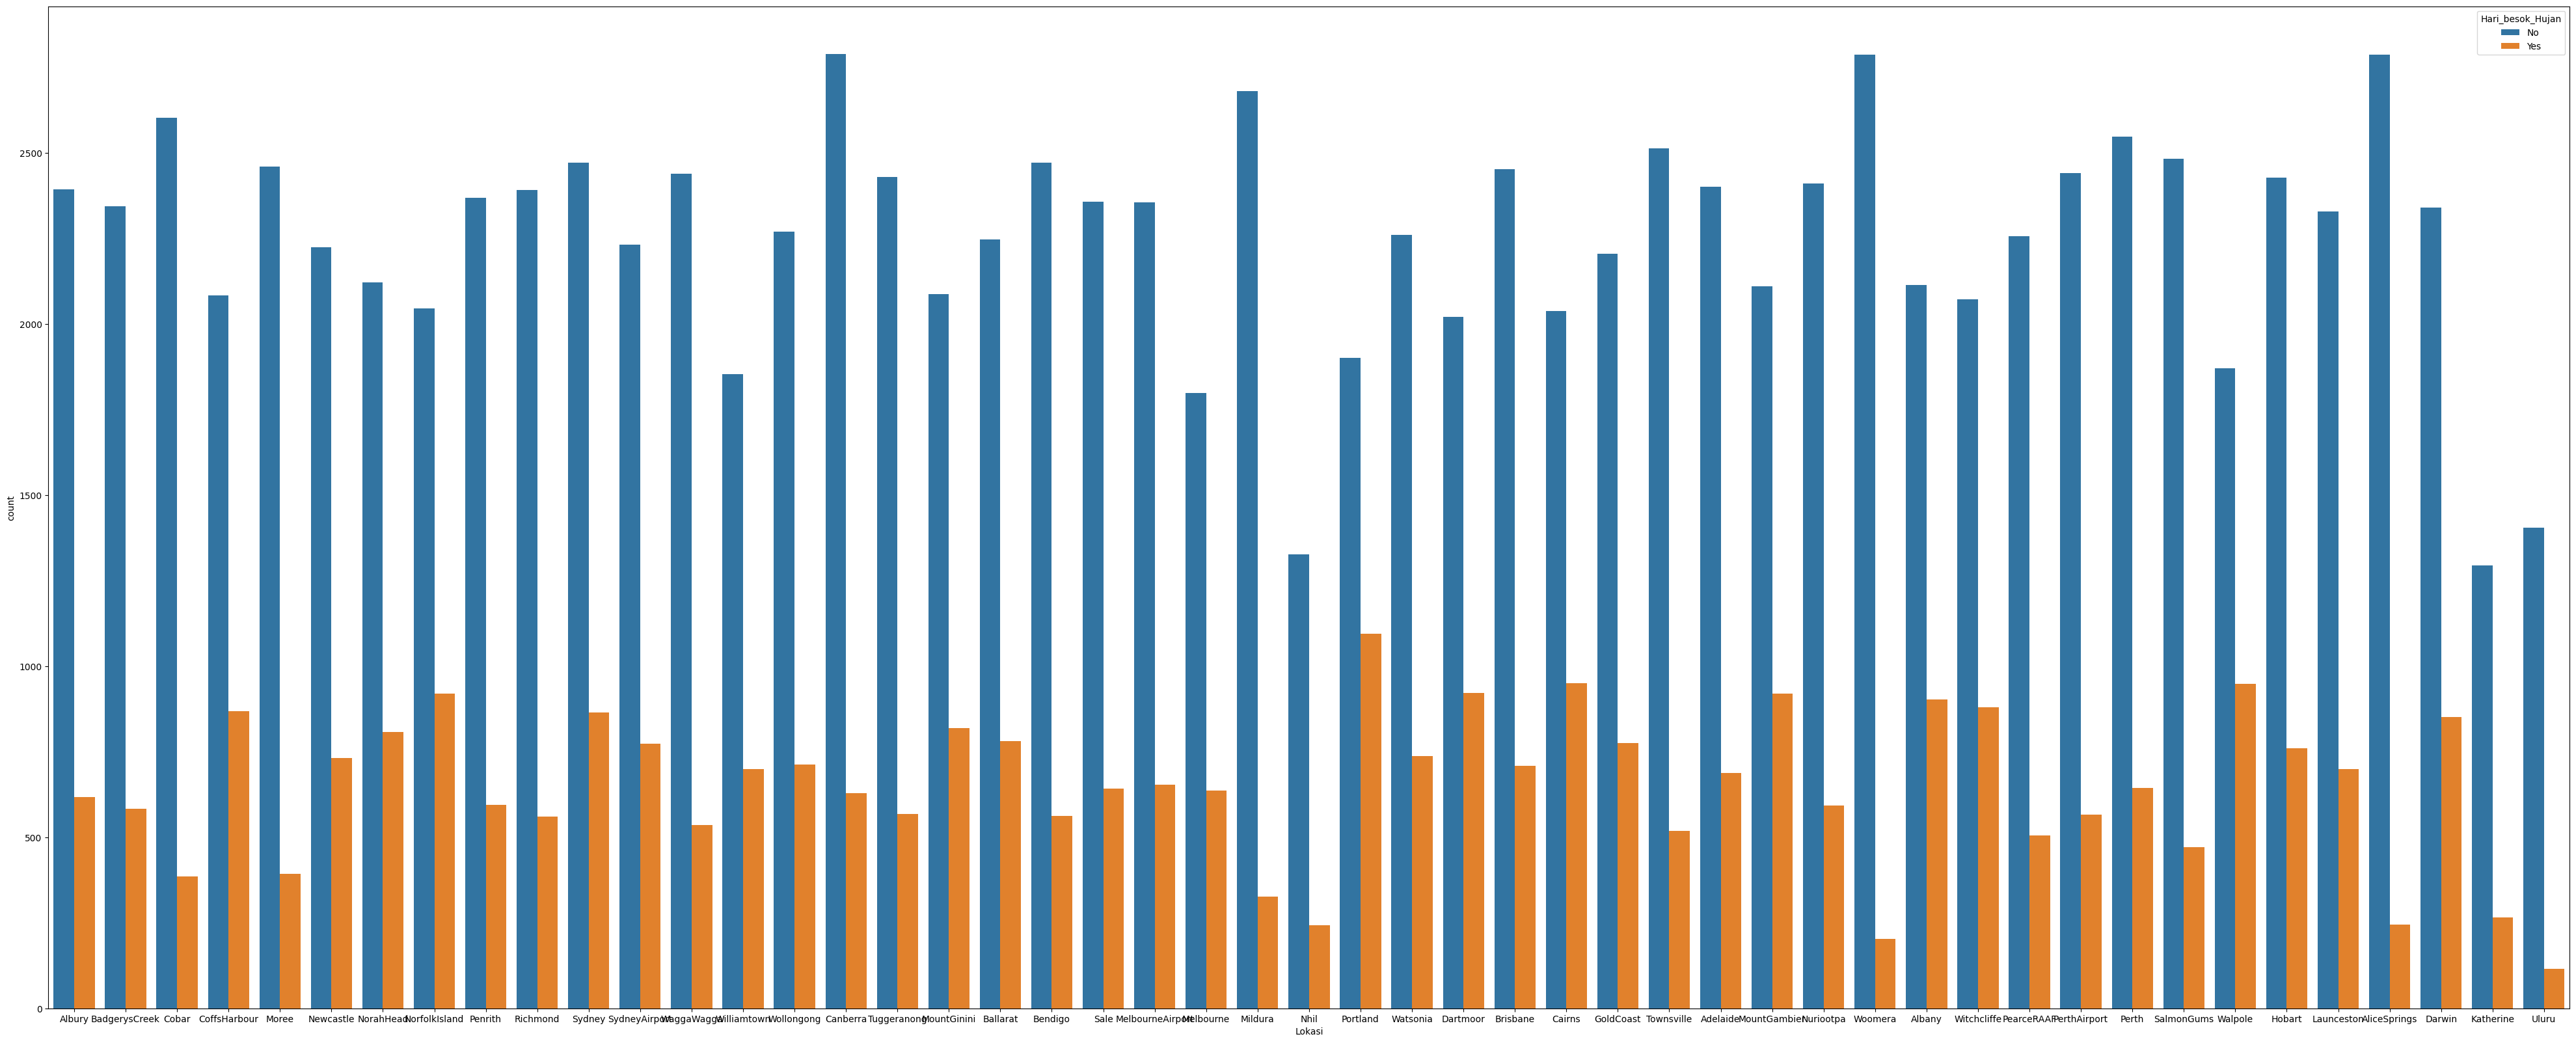

In [116]:
# Melihat intensitas HujanBesok di setiap lokasi
plt.figure(figsize=(50,20))
ax = sns.countplot(x="Lokasi", hue="Hari_besok_Hujan", data=df4)

Terlihat bahwa Hari_besok_Hujan mempunyai intensitas yang berbeda-beda di setiap lokasi.

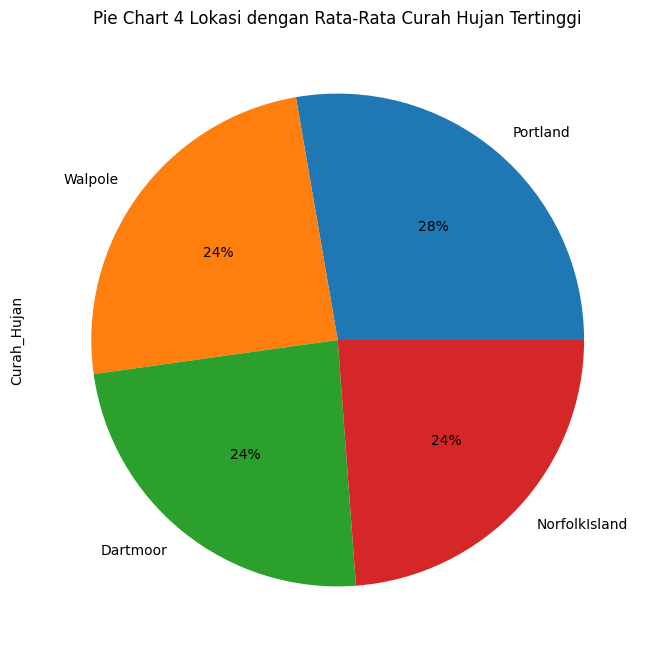

In [ ]:
# Visualisasi pie chart 4 lokasi dengan rata-rata curah hujan tertinggi
df_mean_top4 = df_mean.head(4)
df_area = df_mean_top4.groupby(['Lokasi']).sum()['Curah_Hujan'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(22,8), autopct='%1.0f%%')

plt.title("Pie Chart 4 Lokasi dengan Rata-Rata Curah Hujan Tertinggi")
plt.show()

Dapat dilihat pada pie chart diatas yang memiliki rata rata curah hujan tertinggi yaitu pada Portland sebesar 25% , Walpole 25 % , Dartmoor dan NorfolkIsland 24 %.

#### E.2 Correlation Matrix

In [117]:
# Menghitung korelasi antar-kolom pada sebuah dataframe
df4.corr(numeric_only=True)

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Penguapan,Sinar_Matahari,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembapan_9Pagi,Kelembapan_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Awan_9Pagi,Awan_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
Suhu_Minimum,1.000000,0.733908,0.051323,0.420231,0.051905,0.181196,0.179000,0.178313,-0.232126,0.005950,-0.429817,-0.438101,0.061463,0.015904,0.898071,0.699777,0.001498,-0.203839,0.039136
Suhu_Maksimum,0.733908,1.000000,-0.255723,0.513427,0.332209,0.073760,0.017461,0.053749,-0.498937,-0.499478,-0.315753,-0.402987,-0.227218,-0.214901,0.880257,0.969844,-0.000459,-0.164514,0.058318
Curah_Hujan,0.051323,-0.255723,1.000000,-0.189345,-0.263306,0.151352,0.101274,0.079412,0.387141,0.406119,-0.180206,-0.095613,0.270076,0.234083,-0.114105,-0.260139,0.003278,0.012030,-0.015168
Penguapan,0.420231,0.513427,-0.189345,1.000000,0.338406,0.172842,0.166525,0.120247,-0.434991,-0.329181,-0.251963,-0.274275,-0.179926,-0.176330,0.491552,0.497546,-0.006275,-0.023639,0.041508
Sinar_Matahari,0.051905,0.332209,-0.263306,0.338406,1.000000,-0.018256,0.008666,0.042939,-0.352476,-0.446849,0.029310,-0.017332,-0.537714,-0.559379,0.210299,0.350266,-0.000848,0.017322,0.008079
Kecepatan_Angin,0.181196,0.073760,0.151352,0.172842,-0.018256,1.000000,0.579150,0.660493,-0.215608,-0.029331,-0.424842,-0.382334,0.050813,0.078488,0.154971,0.039919,-0.009864,0.058393,-0.031185
Kecepatan_Angin_9Pagi,0.179000,0.017461,0.101274,0.166525,0.008666,0.579150,1.000000,0.508507,-0.274166,-0.033276,-0.214205,-0.164554,0.017606,0.039049,0.132855,0.007777,-0.009292,0.051335,-0.020981
Kecepatan_Angin_3Sore,0.178313,0.053749,0.079412,0.120247,0.042939,0.660493,0.508507,1.000000,-0.147419,0.014623,-0.276243,-0.237891,0.040805,0.018127,0.166907,0.032122,-0.010375,0.059649,-0.032741
Kelembapan_9Pagi,-0.232126,-0.498937,0.387141,-0.434991,-0.352476,-0.215608,-0.274166,-0.147419,1.000000,0.659634,0.133287,0.177485,0.354967,0.275090,-0.470027,-0.491326,0.015606,-0.089153,0.010647
Kelembapan_3Sore,0.005950,-0.499478,0.406119,-0.329181,-0.446849,-0.029331,-0.033276,0.014623,0.659634,1.000000,-0.024249,0.050290,0.400006,0.407898,-0.217206,-0.555382,0.013040,-0.018315,-0.008990


Informasi yang didapat antara lain:
- Korelasi antara Suhu_Minimum dengan Tahun adalah 0.039
- Korelasi Suhu_Maksimum dengan Bulan adalah -0.203
- Korelasi Curah_Hujan dengan Suhu_Minimum adalah 0.051


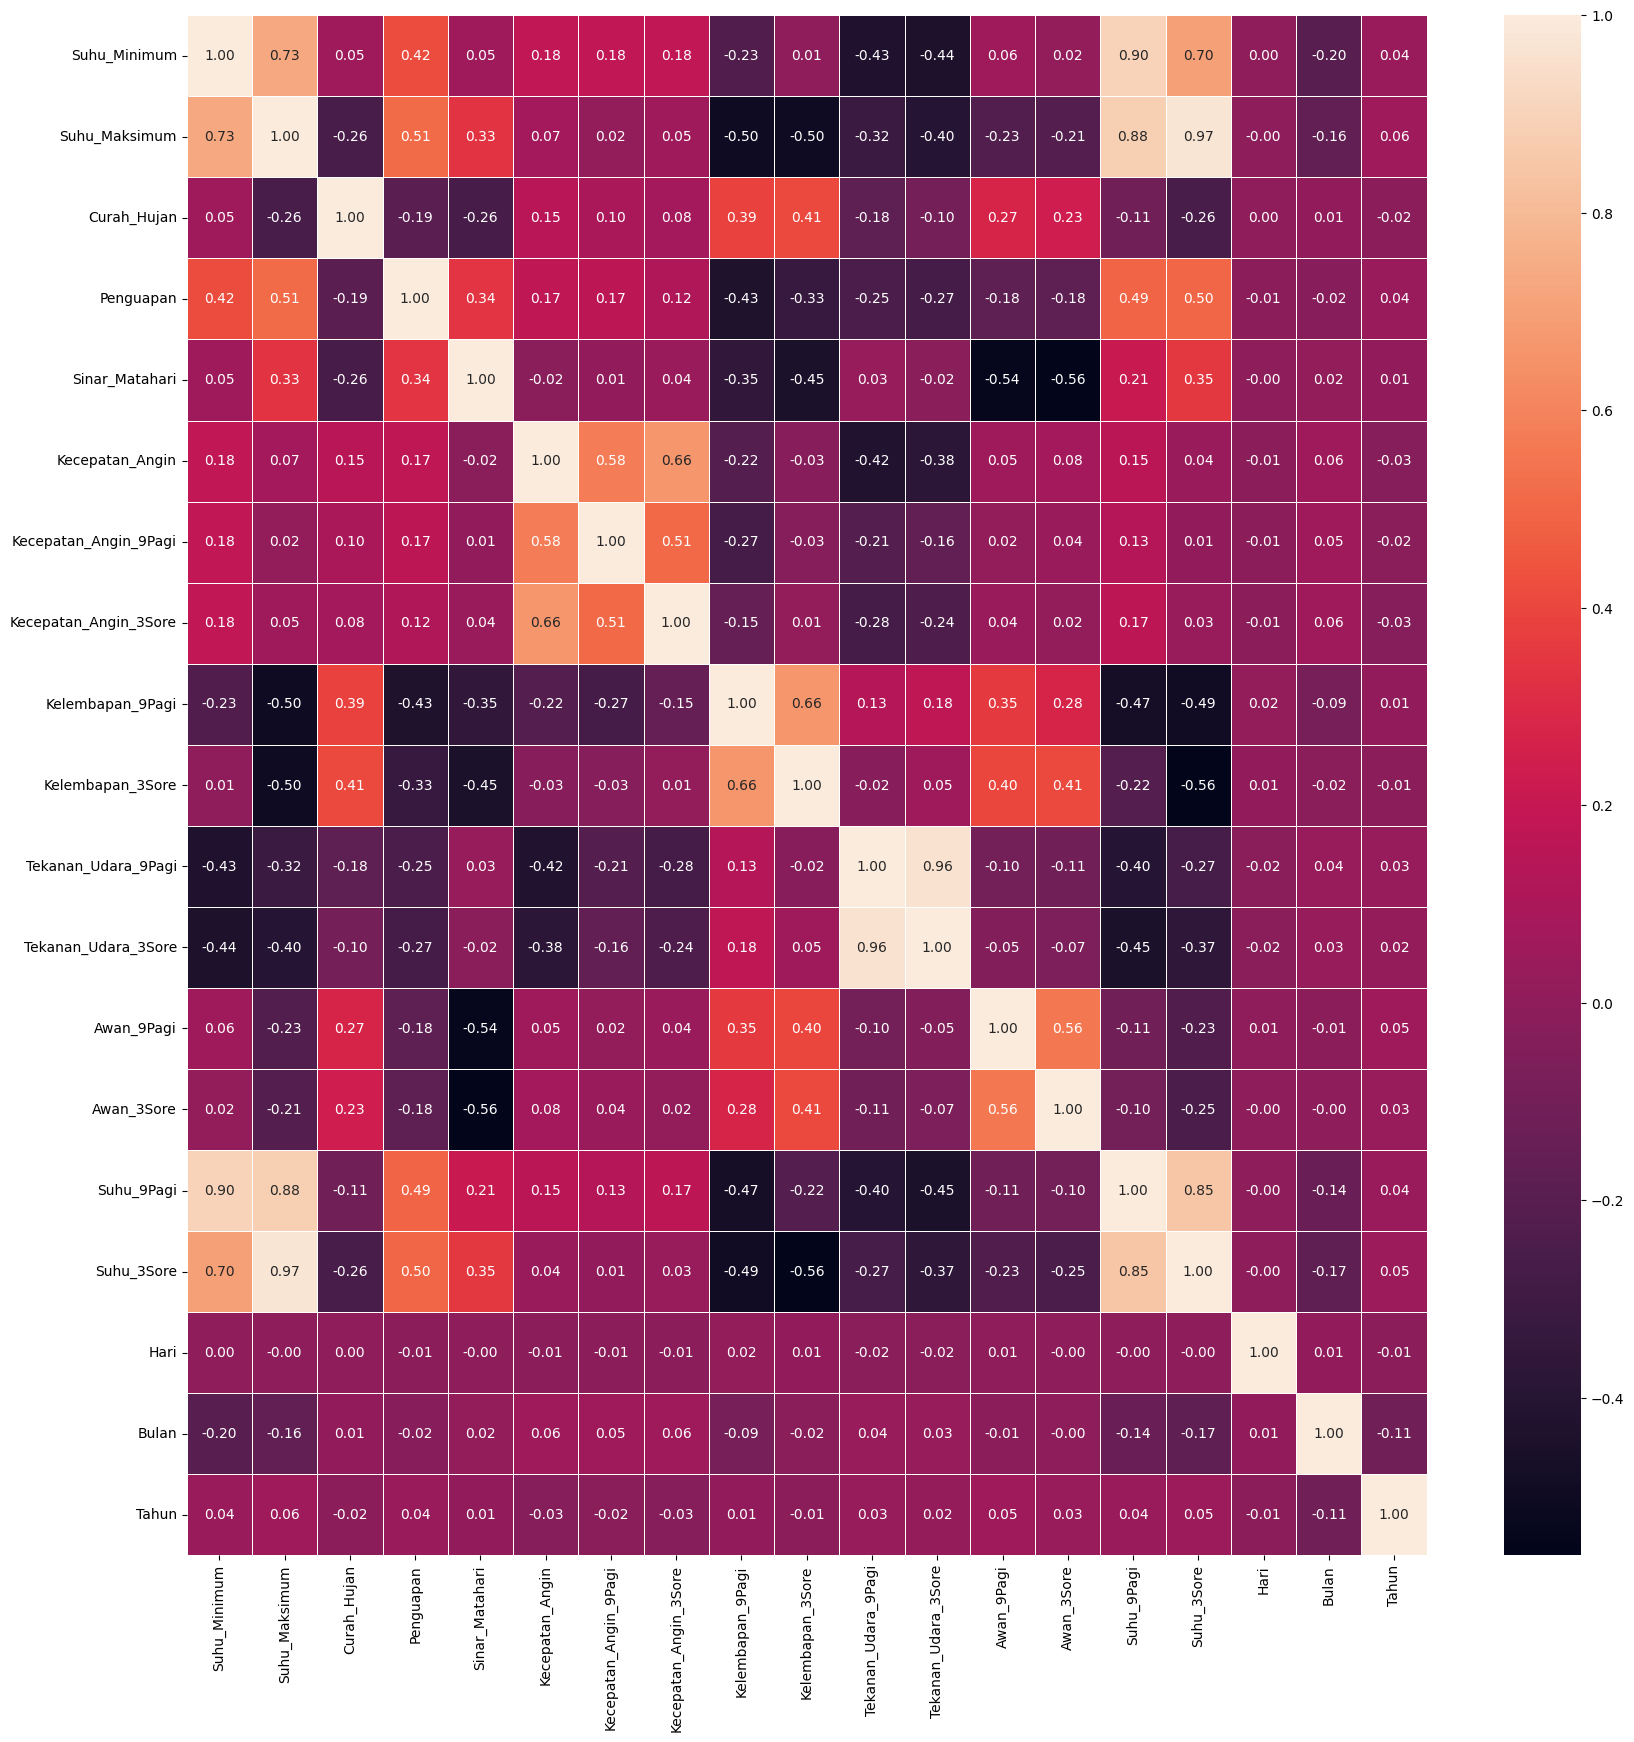

In [118]:
# Melakukan visualisasi korelasi antar variabel untuk melihat hubungan
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df4.corr(numeric_only=True), linewidths = .5, annot=True, fmt='.2f')

Dapat dilihat bahwa terdapat korelasi yang tinggi (>0,8) diantara atribut Tekanan_Udara_3Sore dan Tekanan_Udara_9Pagi, Suhu_Maksimum dan Suhu_3Sore, Suhu_Minimum dan Suhu_Maksimum, Suhu_9Pagi dan Suhu_Maksimum, yang berarti atribut tersebut merepresentasikan informasi yang sama. Oleh karena itu, harus dikeluarkan salah satu.

In [119]:
df5 = df4.drop(['Tekanan_Udara_3Sore','Suhu_Maksimum','Suhu_9Pagi'],axis = 1)

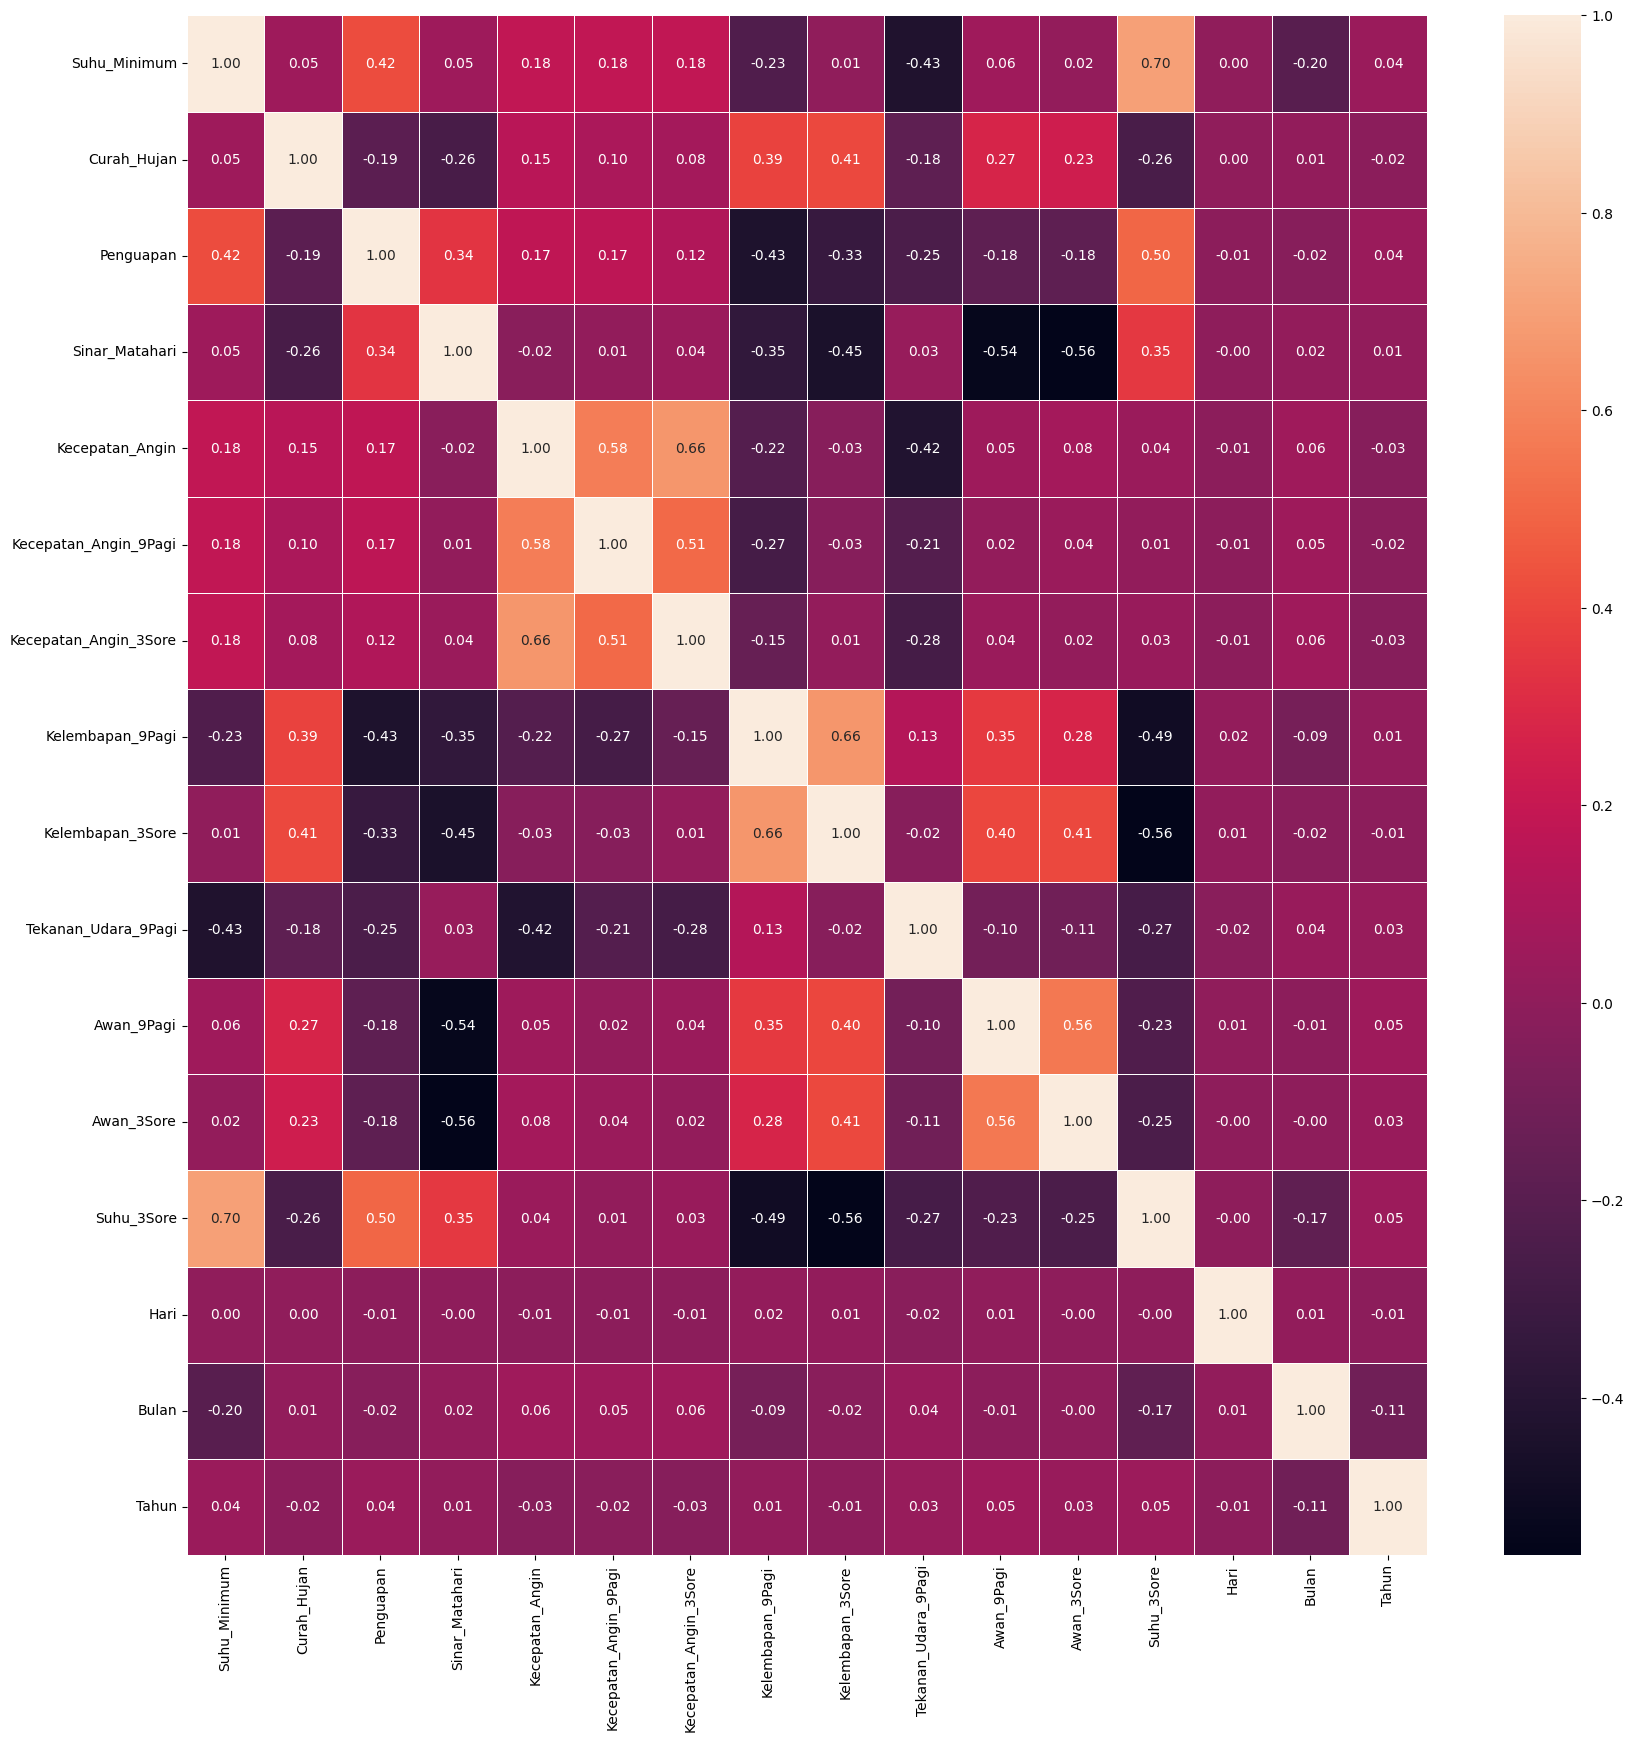

In [124]:
# Mengecek ulang
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df5.corr(numeric_only=True), linewidths = .5, annot=True, fmt='.2f')

Tampilan setelah kolom 'Tekanan_Udara_3Sore','Suhu_Maksimum','Suhu_9Pagi' di drop.

In [127]:
# Menampilkan nama kolom
df5.columns

Index(['Lokasi', 'Suhu_Minimum', 'Curah_Hujan', 'Penguapan', 'Sinar_Matahari',
       'Arah_Angin', 'Kecepatan_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore',
       'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembapan_9Pagi',
       'Kelembapan_3Sore', 'Tekanan_Udara_9Pagi', 'Awan_9Pagi', 'Awan_3Sore',
       'Suhu_3Sore', 'Hari_ini_Hujan', 'Hari_besok_Hujan', 'Hari', 'Bulan',
       'Tahun'],
      dtype='object')

### F. Data Preprocessing

In [128]:
# Memperbarui list atribut bertipe numerik dan kategorik
categorical = [i for i in df5.columns if df5[i].dtypes == 'O']
numerical = [i for i in df5.columns if i not in categorical]
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['Lokasi', 'Arah_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore', 'Hari_ini_Hujan', 'Hari_besok_Hujan']
numerical : ['Suhu_Minimum', 'Curah_Hujan', 'Penguapan', 'Sinar_Matahari', 'Kecepatan_Angin', 'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembapan_9Pagi', 'Kelembapan_3Sore', 'Tekanan_Udara_9Pagi', 'Awan_9Pagi', 'Awan_3Sore', 'Suhu_3Sore', 'Hari', 'Bulan', 'Tahun']


#### F.1 Encoding Data Columns

In [129]:
# Encoding atribut kategorik menggunakan replace function pada atribut bertipe Object
# Encoding pada atribut Hari_ini_Hujan dan Hari_besok_Hujan
df5['Hari_ini_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)
df5['Hari_besok_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)

In [138]:
def encode_data(feature_name):

    mapping_dict = {}
    unique_values = list(df5[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [139]:
df5['Arah_Angin'].replace(encode_data('Arah_Angin'),inplace = True)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}


In [140]:
df5['Arah_Angin_9Pagi'].replace(encode_data('Arah_Angin_9Pagi'),inplace = True)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}


In [141]:
df5['Arah_Angin_3Sore'].replace(encode_data('Arah_Angin_3Sore'),inplace = True)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}


In [142]:
df5['Lokasi'].replace(encode_data('Lokasi'), inplace = True)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48}


In [143]:
# Menampilkan 5 data teratas
df5.head()

,Lokasi,Suhu_Minimum,Curah_Hujan,Penguapan,Sinar_Matahari,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Kecepatan_Angin_9Pagi,...,Kelembapan_3Sore,Tekanan_Udara_9Pagi,Awan_9Pagi,Awan_3Sore,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,0,13.4,0.6,4.8,7.624853,0,44.0,0,0,20.0,...,22.0,1007.7,8.000000,4.503167,21.8,0,0,1,12,2008
1,0,7.4,0.0,4.8,7.624853,1,44.0,1,1,4.0,...,25.0,1010.6,4.437189,4.503167,24.3,0,0,2,12,2008
2,0,12.9,0.0,4.8,7.624853,2,46.0,0,1,19.0,...,30.0,1007.6,4.437189,2.000000,23.2,0,0,3,12,2008
3,0,9.2,0.0,4.8,7.624853,3,24.0,2,2,11.0,...,16.0,1017.6,4.437189,4.503167,26.5,0,0,4,12,2008
4,0,17.5,1.0,4.8,7.624853,0,41.0,3,3,7.0,...,33.0,1010.8,7.000000,8.000000,29.7,0,0,5,12,2008


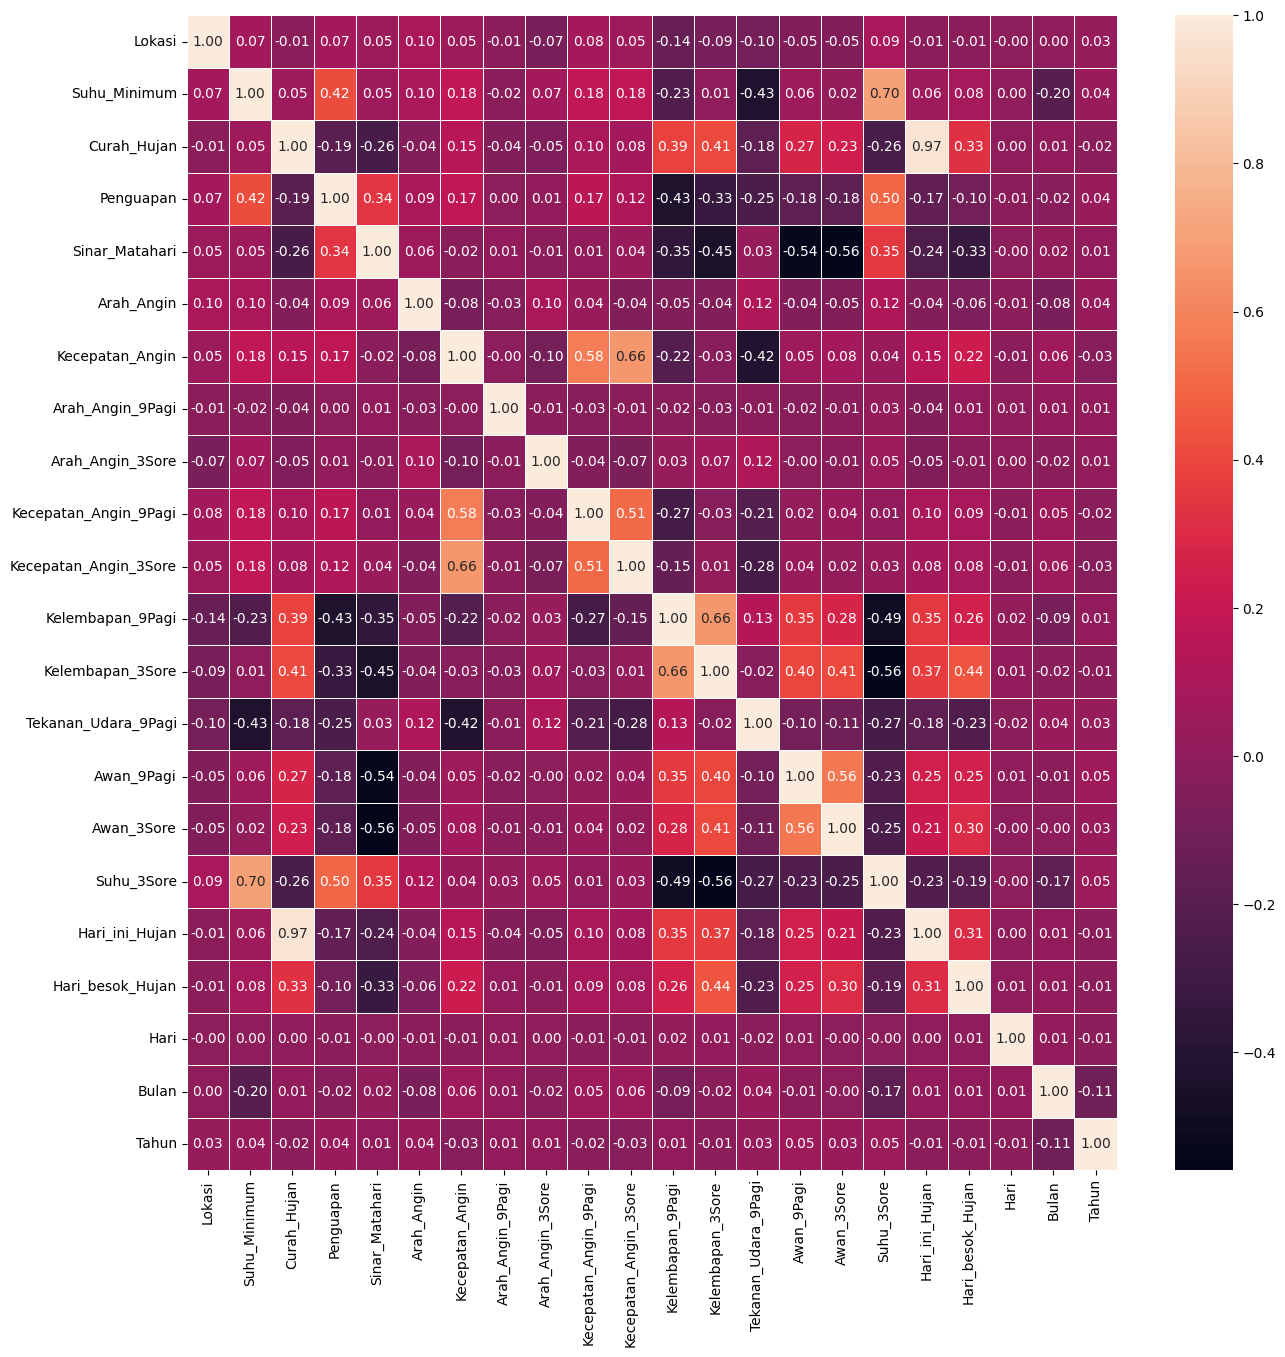

In [144]:
# Mengecek ulang korelasi
fig, ax = plt.subplots(figsize=(15,15))
cm = sns.heatmap(df5.corr(), linewidths = .5, annot=True, fmt='.2f')

Informasi yang dapat diperoleh antara lain:
- Atribut Lokasi, Penguapan,Arah_Angin, Arah_Angin_3Sore, Tekanan_Udara_9Pagi, Suhu_3Sore, dan Tahun berkorelasi negatif dengan atribut target (Hari_besok_Hujan)
- Atribut selain yang disebutkan di atas memiliki korelasi positif terhadap Hari_besok_Hujan.
- Atribut yang berkorelasi cukup tinggi dengan atribut Hari_besok_Hujan adalah Kelembaban_3Sore, Curah_Hujan, dan Hari_ini_Hujan

#### F.2 Feature Selection

In [145]:
# Melakukan inisialisasi variabel X dan y
X = df5.drop(['Hari_besok_Hujan'], axis=1)
y = df5['Hari_besok_Hujan']
print(X.shape)
print(y.shape)

(142193, 21)
(142193,)


Dikarenakan data tidak seimbang, kita melakukan resampling data dengan salah satu teknik yang dinakan Random under-sampling. Teknik ini merupakan teknik resampling data yang digunakan ketika kelas minoritas dalam dataset terlalu sedikit dan ingin menyeimbangkan jumlah sampel pada setiap kelas. Teknik ini mengurangi jumlah sampel pada kelas mayoritas secara acak hingga jumlahnya sama dengan jumlah sampel pada kelas minoritas.

In [146]:
# Import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_rus))

Original dataset shape: Counter({0: 110316, 1: 31877})
Resample dataset shape: Counter({0: 31877, 1: 31877})


In [147]:
# Create a DataFrame of the resampled data
df_rus = pd.DataFrame(data=x_rus, columns=X.columns)
df_rus['target'] = y_rus

In [148]:
# Membuat X_fit
X_fit = df_rus[X.columns]

# Melakukan feature selection menggunakan library F regression dengan k=12 pada X_fit
topFeatures = SelectKBest(f_regression, k=12)
fit = topFeatures.fit(X_fit, y_rus)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_fit.columns)

featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 12 Features yang Berpengaruh")
print(featureScores.nlargest(12, 'Score'))

Top 12 Features yang Berpengaruh
                 Features         Score
12       Kelembapan_3Sore  21660.640203
4          Sinar_Matahari  10006.916385
15             Awan_3Sore   9700.727284
2             Curah_Hujan   9000.995854
17         Hari_ini_Hujan   7768.282052
11       Kelembapan_9Pagi   7028.907323
14             Awan_9Pagi   6673.345880
13    Tekanan_Udara_9Pagi   4935.609210
6         Kecepatan_Angin   4227.469581
16             Suhu_3Sore   3555.434145
3               Penguapan    978.279627
9   Kecepatan_Angin_9Pagi    618.173685


Dengan menggunakan library F regression juga didapatkan bahwa 12 feature yang paling berpengaruh dalam model yaitu Kelembapan_3Sore,Curah_Hujan, Sinar_Matahari, Hari_Ini_Hujan, Awan3_Sore, Kelembapan_9Pagi, Awan_9Pagi,Tekanan_Udara_9Pagi, Kecepatan_Angin, Suhu_3Sore, Penguapan dan Kecepatan_Angin_9Pagi.

In [149]:
# Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk selanjutnya dilakukan pemodelan
X_fit = df_rus[['Kelembapan_3Sore','Curah_Hujan','Sinar_Matahari','Hari_ini_Hujan','Awan_3Sore',
            'Kelembapan_9Pagi','Awan_9Pagi','Tekanan_Udara_9Pagi','Kecepatan_Angin','Suhu_3Sore','Penguapan','Kecepatan_Angin_9Pagi']]

In [150]:
# Melihat 5 Baris teratas
X_fit.head()

,Kelembapan_3Sore,Curah_Hujan,Sinar_Matahari,Hari_ini_Hujan,Awan_3Sore,Kelembapan_9Pagi,Awan_9Pagi,Tekanan_Udara_9Pagi,Kecepatan_Angin,Suhu_3Sore,Penguapan,Kecepatan_Angin_9Pagi
20515,82.0,0.0,7.624853,0,4.503167,76.0,4.437189,1021.5,52.0,20.9,4.8,22.0
1119,30.0,0.0,7.624853,0,4.503167,55.0,4.437189,1017.4,26.0,31.1,4.8,11.0
137404,14.0,0.0,11.200000,0,2.000000,22.0,0.000000,1022.7,31.0,25.9,4.2,11.0
145411,21.0,0.0,7.624853,0,4.503167,42.0,4.437189,1025.6,39.0,24.4,4.8,19.0
102628,36.0,0.0,8.300000,0,2.000000,87.0,8.000000,1020.9,30.0,22.5,4.0,9.0


In [151]:
# Melihat informasi (kolom, baris, tipe data) dan dimensi pada dataframe X_fit
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63754 entries, 20515 to 145393
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kelembapan_3Sore       63754 non-null  float64
 1   Curah_Hujan            63754 non-null  float64
 2   Sinar_Matahari         63754 non-null  float64
 3   Hari_ini_Hujan         63754 non-null  int64  
 4   Awan_3Sore             63754 non-null  float64
 5   Kelembapan_9Pagi       63754 non-null  float64
 6   Awan_9Pagi             63754 non-null  float64
 7   Tekanan_Udara_9Pagi    63754 non-null  float64
 8   Kecepatan_Angin        63754 non-null  float64
 9   Suhu_3Sore             63754 non-null  float64
 10  Penguapan              63754 non-null  float64
 11  Kecepatan_Angin_9Pagi  63754 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 6.3 MB


In [152]:
X_fit.shape

(63754, 12)

Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 70% (0.70) dan Testing data sebesar 30% (0.30)

In [153]:
# Bagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_fit, y_rus, test_size=0.30, random_state=13)

### G. Pendefinisian Model

#### G.1 Model Logistic Regression

 Logistic regression dapat digunakan untuk klasifikasi biner, yaitu ketika target variabel hanya memiliki dua kelas. Contoh penggunaannya adalah dalam kasus klasifikasi email spam atau non-spam, di mana target variabel adalah "spam" atau "non-spam". Logistic regression juga dapat digunakan untuk klasifikasi multikelas, yaitu ketika target variabel memiliki lebih dari dua kelas. Contoh penggunaannya adalah dalam kasus klasifikasi jenis bunga, di mana target variabel adalah "setosa", "versicolor", atau "virginica". Selain itu dapat digunakan untuk memprediksi probabilitas suatu kejadian

In [154]:
# Membuat model logistic regression
# Solver digunakan untuk menentukan algoritma yang digunakan oleh model untuk meminimalkan fungsi kerugian dan memperkirakan parameter model.
logreg = LogisticRegression(solver='liblinear', random_state=0)

#### G.2 Model Support Vector Machines (SVM)

SVM dapat digunakan untuk menangani dataset yang memiliki banyak fitur dan fitur yang sangat kompleks. SVM bekerja dengan baik pada dataset yang relatif kecil, dan dapat memberikan hasil yang lebih akurat dan lebih cepat daripada algoritma machine learning lainnya, dan SVM dapat dengan mudah diimplementasikan di Python dengan menggunakan library seperti scikit-learn.

In [155]:
# Membuat model SVM
svm = SVC(kernel='linear')

### H. PELATIHAN MODEL

#### H.1 Model Logistic Regression

In [156]:
lg = logreg.fit(X_train, y_train)
lg

LogisticRegression(random_state=0, solver='liblinear')

In [157]:
# Memeriksa output model
lg.classes_

array([0, 1], dtype=int64)

In [158]:
# Memeriksa intercept model dan koefisien model
# Intercept adalah nilai konstan pada model dan menunjukkan nilai prediksi variabel dependen ketika semua variabel independen bernilai nol.
# Koefisien menunjukkan seberapa besar perubahan pada variabel independen akan mempengaruhi nilai prediksi variabel dependen.
print(lg.intercept_, lg.coef_)

[8.78232942] [[ 0.05386683  0.37290562 -0.13090099 -0.1638435   0.13460554  0.00495169
  -0.00668372 -0.01467617  0.05725117  0.03746564 -0.00240809 -0.02340775]]


#### H.2 Model Support Vector Machines (SVM)

In [159]:
svm = svm.fit(X_train, y_train)
svm

SVC(kernel='linear')

In [160]:
# Memeriksa output model
svm.classes_

array([0, 1], dtype=int64)

### I. EVALUASI MODEL

Pada bagian ini, dilakukan evaluasi model yang menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa model.

#### I.1 Model Logistic Regression

In [161]:
# Memeriksa performa dengan .prdict_proba()
logreg.predict_proba(X_test)

# Melihat predicted outputs dengan .predict()
y_pred_logreg = logreg.predict(X_test)

# Melihat nilai akurasi
print("Test score:", logreg.score(X_test, y_test))
print("Train score:", logreg.score(X_train, y_train))

Test score: 0.7731479061013228
Train score: 0.7688618997467901


Berdasarkan score diatas diperoleh nilai akurasi dari test data ialah $0.7729910597584566 \approx 0.77 = 77$%, sedangkan nilai akurasi dari train test sebesar $0.7688170838281758 \approx 0.76 = 76$%.

In [162]:
# Confusion matriks
confusion_matrix(y_test, y_pred_logreg)

array([[7447, 2087],
       [2252, 7341]], dtype=int64)

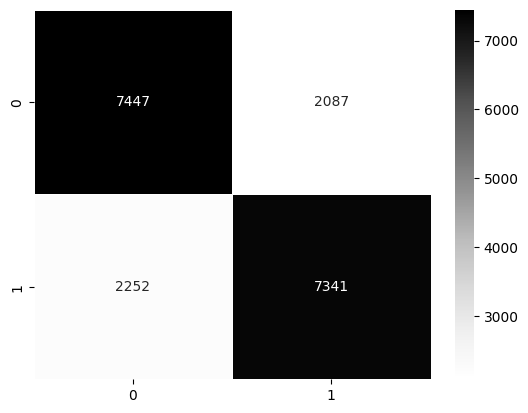

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      9534
           1       0.78      0.77      0.77      9593

    accuracy                           0.77     19127
   macro avg       0.77      0.77      0.77     19127
weighted avg       0.77      0.77      0.77     19127



In [163]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Greys')
plt.show()
print(classification_report(y_test, y_pred_logreg))

Berdasarkan hasil confusion matrix diperoleh bahwa  nilai TP (True Positive) ialah 7446, FP (False Positive) ialah 2088, FN (False Negative) ialah 7339, dan TN (True Negative) ialah 2254.

In [164]:
# Summary evaluasi model
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_logreg))
print('Presisi :', precision_score(y_test,y_pred_logreg))
print('Recall :', recall_score(y_test,y_pred_logreg))
print('F1 Score :', f1_score(y_test,y_pred_logreg))

Ringkasan Evaluasi Model
Akurasi : 0.7731479061013228
Presisi : 0.7786380992787442
Recall : 0.7652454915042218
F1 Score : 0.7718837074812049


#### I.2 Model Support Vector Machines

In [165]:
# Melihat predicted outputs dengan .predict()
y_pred_svm = svm.predict(X_test)

# Melihat nilai akurasi dengan .score
print("Test score:", svm.score(X_test, y_test))
print("Train score:", svm.score(X_train, y_train))

Test score: 0.7728342134155906
Train score: 0.7691756111770901


Berdasarkan score diatas diperoleh nilai akurasi dari test data ialah $0.7728342134155906 \approx 0.77 = 77$%, sedangkan nilai akurasi dari train test sebesar $0.7691756111770901 \approx 0.76 = 76$%.

In [166]:
# Confusion matriks
confusion_matrix(y_test, y_pred_svm)

array([[7579, 1955],
       [2390, 7203]], dtype=int64)

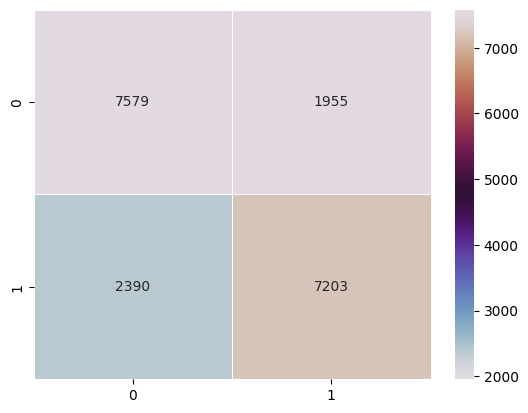

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      9534
           1       0.79      0.75      0.77      9593

    accuracy                           0.77     19127
   macro avg       0.77      0.77      0.77     19127
weighted avg       0.77      0.77      0.77     19127



In [167]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'twilight')
plt.show()
print(classification_report(y_test, y_pred_svm))

Berdasarkan hasil confusion matrix diperoleh bahwa nilai TP (True Positive) ialah 7579, FP (False Positive) ialah 1955, FN (False Negative) ialah 7203, dan TN (True Negative) adalah 2390.

In [168]:
# Summary evaluasi model
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_svm))
print('Presisi :', precision_score(y_test,y_pred_svm))
print('Recall :', recall_score(y_test,y_pred_svm))
print('F1 Score :', f1_score(y_test,y_pred_svm))

Ringkasan Evaluasi Model
Akurasi : 0.7728342134155906
Presisi : 0.7865254422362962
Recall : 0.7508600020848535
F1 Score : 0.7682790251186603


- Nilai akurasi dari model logistic regression dan SVM tidak jauh berbeda, keduanya memiliki nilai akurasi sebesar 77%.
- Nilai Presisis, Akurasi, Recall model, dan F1 Score model logistic regression lebih tinggi daripada model SVM.

### J. MODEL INFERENCE

In [170]:
lokasi = input("Masukkan nama lokasi: ")
temp_min = float(input("Masukkan suhu minimal: "))
temp_max = float(input("Masukkan suhu maksimal: "))
curah_hujan = float(input("Masukkan curah hujan: "))
evaporasi = float(input("Masukkan evaporasi: "))
sinar_matahari = float(input("Masukkan sinar matahari: "))
kecepatan_angin = float(input("Masukkan kecepatan angin: "))
kelembapan_9am = float(input("Masukkan kelembapan pukul 9 pagi: "))
kelembapan_3pm = float(input("Masukkan kelembapan pukul 3 sore: "))
awan_9am = float(input("Masukkan persentase awan pukul 9 pagi: "))
awan_3pm = float(input("Masukkan persentase awan pukul 3 sore: "))
hujan_hari_ini = input("Apakah hari ini hujan? (Yes/No): ")

val = [temp_min, temp_max, curah_hujan, evaporasi, sinar_matahari, kecepatan_angin, kelembapan_9am, kelembapan_3pm, awan_9am, awan_3pm]

lokasi_col = 'Location_' + lokasi
if lokasi_col in X.columns:
    val.append(1)
else:
    val.append(0)

if hujan_hari_ini == 'No':
    val.append(0)
else:
    val.append(1)

predict_logreg = logreg.predict([val])
predict_svm = svm.predict([val])

if predict_logreg == 0 :
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok tidak hujan")
else:
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan")

if predict_svm == 0 :
    print("Berdasarkan prediksi menggunakan SVM Maka Maka Besok tidak hujan")
else:
    print("Berdasarkan prediksi menggunakan SVM Maka Maka Besok hujan")

Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan
Berdasarkan prediksi menggunakan SVM Maka Maka Besok hujan


Kita dapat memasukkan lokasi, temp_min, temp_max, curah_hujan, evaporasi, sinar_matahari, kecepatan_angin, kelembapan_9am, kelembapan_3pm, awan_9am, awan_3pm sesuai kehendak kita, dan model akan memprediksi dari atribut tersebut apakah besok hujan atau tidak. Dari kedua model tersebut memiliki prediksi yang sama.

### K. KESIMPULAN

Kesimpulan yang dapat diambil antara lain:
- Atribuut pada dataset memiliki distribusi normal dan tidak normal, serta memiliki outlier dan missing values.
- Dikarenakan data tidak seimbang kita perlu melakukan resampling data, salah satu teknik yang digunakan adalah random under-sampling. Teknik ini mengurangi jumlah sampel pada kelas mayoritas secara acak hingga jumlahnya sama dengan jumlah sampel pada kelas minoritas. Penggunaan teknik resampling pada dataset nantinya akan mempengaruhi kinerja model.
- Dengan menggunakan library F regression didapatkan 12 feature yang paling berpengaruh dalam model yaitu Kelembapan_3Sore,Curah_Hujan, Sinar_Matahari, Hari_Ini_Hujan, Awan3_Sore, Kelembapan_9Pagi, Awan_9Pagi,Tekanan_Udara_9Pagi, Kecepatan_Angin, Suhu_3Sore, Penguapan dan Kecepatan_Angin_9Pagi.
- Nilai akurasi dari model logistic regression dan SVM tidak jauh berbeda, keduanya memiliki nilai akurasi sebesar 77%.
- Nilai Presisis, Akurasi, Recall model, dan F1 Score model logistic regression lebih tinggi daripada model SVM.
- Kedua model akan memiliki prediksi yang sama apabila kita memasukkan data yang sama.